# Finding Mutations
# A. Comparing Biological Sequences

Code: Nhan TV.<br>
Email: TaVanNhan_sdh@hus.edu.vn.<br>

Compeau, Phillip. <i>Bioinformatics Algorithms: An Active Learning Approach by Phillip Compeau, Pavel Pevzner (2014) Paperback.</i> La Jolla, CA: Active Learning Publishers, 2014.

## Workflow

<a><img src="https://imgur.com/SehRgpW.jpg" width="800" align="center">

## Table of Contents
1 [Bẻ khóa mã phi Ribosome](#ribosome)<br>
   &emsp;1.1 [Ribosome là gì?](#def)<br>
   &emsp;1.2 [Quá trình giải mã thông điệp ẩn trong DNA](#DNA)<br>
   &emsp;1.3 [Bẻ khóa mã phi Ribosome](#bekhoa)<br>
   &emsp;1.4 [Từ sự so sánh protein đến mã phi Ribosome](#pro-ribo)<br>
   &emsp;1.5 [Điểm chung của Oncogene và các yếu tố tăng trưởng](#oncogene)<br>
2 [Sequence alignment và the longest common subsequence (LCS)](#lcs)<br>
   &emsp;2.1 [Dynamic programming for the change problem](#dynamic)<br>
   &emsp;2.2 [The Manhattan tourist problem](#manhattan)<br>
   &emsp;2.3 [Dynamic programming in an arbitrary DAG](#dynamicdag)<br>
   &emsp;2.4 [Finding a Topological Ordering from a DAG](#topological)<br>
3 [Scoring alignments](#scoring)<br>
4 [From Global to Local Alignment](#global-local)<br>
   &emsp;4.1 [Limitations of global alignment](#limit-global)<br>
   &emsp;4.2 [Free taxi rides in the alignment graph](#free-taxi)<br>
   &emsp;4.3 [The changing faces of sequence alignment](#changing-faces)<br>
5 [Penalizing Insertions and Deletions in Sequence Alignment](#penalizing)<br>
&emsp;5.1 [Mô hình phạt khoảng trống Affine (Affine gap penalty)](#three_levels)<br>
&emsp;5.2 [Đồ thị Manhattan ba cấp](#three_levels)<br>
&emsp;5.3 [Affine gap penalty for local alignment](#affine_local)<br>
6 [Space-Efficient Sequence Alignment](#space-efficient)<br>
&emsp;6.1 [Bài toán tìm cạnh giữa](#middle_edge)<br>
&emsp;6.2 [Linear Space Alignment](#linear-space)<br>
7 [Multiple Sequence Alignment](#multi-sequence)<br>
&emsp;7.1 [Xây dựng đồ thị ba chiều](#three-manhattan)<br>
&emsp;7.2 [Thuật toán tham lam cho dóng hàng đa trình tự](#greedy-multi-alignment)<br>
&emsp;7.3 [Progressive Alignment](#progressive-alignment)<br>
&emsp;7.4 [ClustalW](#clustalw)<br>
&emsp;7.5 [Multiple Sequence Comparison by Log- Expectation (MUSCLE)](#muscle)<br>
&emsp;7.6 [Scoring Multiple Alignments](#scoring-multiple-alignments)<br>
&emsp;7.7 [Các vấn đề của dóng hàng đa trình tự](#problem-of-multi-alignment)

### 1 Bẻ khóa mã phi Ribosome<a name="ribosome"></a>

#### 1.1 Ribosome là gì?<a name="def"></a>

<b> Ribosome</b> được định nghĩa tại <a href = "https://vi.wikipedia.org/wiki/Ribosome">wikipedia</a> (mang tính chất tham khảo) là "bào quan tổng hợp chuỗi polipeptide dựa trên khuôn mã của ARN thông tin. Đây là một bộ máy phân tử lớn, phức tạp, có mặt trong tất cả các tế bào sống, nơi xảy ra quá trình sinh tổng hợp protein. Ribosome liên kết các amino acid với nhau theo trật tự được quy định bởi phân tử (mRNA). Ribosome bao gồm hai tiểu đơn vị chính - tiểu đơn vị ribosome nhỏ đọc mRNA, trong khi tiểu đơn vị lớn liên kết các axit amin để tạo thành một chuỗi polypeptide. Mỗi tiểu đơn vị gồm một hoặc nhiều phân tử RNA ribosome (rRNA) và nhiều phân tử protein.

Thuật ngữ "ribosome" có nguồn gốc "ribonucleic acid" (thành phần chính của bào quan) và tiếng Hy Lạp "soma" có nghĩa là "thể".

Trình tự của DNA mã hóa cho một protein có thể được sao chép nhiều lần vào chuỗi RNA thông tin (mRNA) với một trình tự tương tự. Ribosome có thể liên kết với một chuỗi mRNA và sử dụng nó như một khuôn mẫu để xác định chính xác trình tự của các axit amin trong một protein. Axit amin được lựa chọn, thu thập và mang đến ribosome bởi RNA vận chuyển (phân tử tRNA), nhập vào một phần của ribosome và liên kết với chuỗi mRNA. Các axit amin sau đó sẽ được liên kết với nhau bởi một phần khác của ribosome. Sau khi protein được sản sinh, nó có thể gấp xoắn lại để tạo nên ra một cấu trúc không gian 3 chiều có chức năng chuyển hóa."

#### 1.2 Quá trình giải mã thông điệp ẩn trong DNA<a name="DNA"></a>

Watson và Cricks đã tìm ra cấu trúc chuỗi xoắn kép của DNA vào năm 1953. Sau đó nhà vật lý Geogre Gamow đã sáng lập ra "RNA Tie Club" cho các nhà khoa học với mong muốn giải mã <b>được thông điệp ẩn</b> trong DNA với việc xác định <b> cách mà RNA được chuyển thành các amino acids như thế nào</b>. Một năm sau, Sydney Brenner và Francis Crick đã khám phá ra rằng các <b>amino acids được dịch mã từ các codons, tức là từ bộ 3 nucleotide</b>. Cho dù RNA Tie Club có 8 người đoạt giải Nobel nhưng tất cả đều không giúp họ thành công trong việc giải mã gen.

Vào năm 1961, Marshall Nirenburg đã tổng hợp được các chuỗi RNA chỉ bao gồm uracil (...UUUUUUUUUU...) thêm ribosom và các amino acid tạo ra một peptide chỉ gồm Phenylalamin (...PhePhePhePhe...). Do đó, Nirenburg đã kết luận rằng mã UUU của RNA mã hóa cho amino acid Phenylalamin. Sau thành công của Nirenburg, Har Gobind Khorana đã tổng hợp được chuỗi RNA ...UCU<b>CUC</b>UCU<b>CUC</b>... và chứng minh rằng nó chuyển thành ...SerLeuSerLeu...và phần còn lại của mã gen ribosome đã nhanh chóng được làm sáng tỏ.

#### 1.3 Bẻ khóa mã phi Ribosome<a name="bekhoa"></a>

Gần bốn thập kỷ sau, Mohamed Marahiel bắt đầu giải quyết câu đố khó khăn hơn nhiều về việc bẻ khóa mã phi ribosome. Một ví dụ về phi ribosome đó là vi khuẩn và nấm sản xuất kháng sinh và các peptide phi ribosome khác (non-ribosomal-peptide viết tắt là <b>NRP</b>) không phụ thuộc vào ribosome và mã gen. Thay vào đó, những sinh vật này tạo ra NRP bằng cách sử dụng một loại protein khổng lồ có tên NRP synthetase.

#### DNA --> RNA --> NRP Synthetase --> NRP

NRP synthetase mã hóa 10 loại kháng sinh, chứa chuỗi dài các amino acid Tyrocidine B1, bao gồm 10 phân đoạn được gọi là miền adenylation (A-domain)<a name = "a-domain"></a>; mỗi miền A dài khoảng 500 amino acid và chịu trách nhiệm thêm một amino acid đơn vào Tyrocidine B1.

Thế hệ trước đó, RNA Tie Club đã đưa ra câu hỏi, "RNA mã hóa một amino acid như thế nào?" Bây giờ Marahiel đã đưa ra câu trả lời cho câu hỏi khó khăn hơn nhiều, "Mỗi miền A (A-domain) mã hóa một amino acid như thế nào?"

#### 1.4 Từ sự so sánh protein đến mã phi Ribosome<a name="pro-ribo"></a>

Protein được định nghĩa tại <a href = "https://vi.wikipedia.org/wiki/Protein"> wikipedia</a> là: "những phân tử sinh học, hay đại phân tử, gồm nhiều amino acid. Protein thực hiện rất nhiều chức năng bên trong sinh vật, bao gồm các phản ứng <b>trao đổi chất xúc tác, sao chép DNA, đáp ứng lại kích thích, và vận chuyển phân tử từ một vị trí đến vị trí khác</b>. Các protein khác nhau chủ yếu ở trình tự của các axit amin trong cấu tạo của chúng, mà trình tự này bị chi phối bởi trình tự nucleotide của các gen quy định tương ứng, và ở kết quả của giai đoạn cuộn gập protein (protein folding) thành những cấu trúc 3 chiều xác định lên chức năng của nó."

May mắn rằng Marahiel đã biết đến trình tự amino acid của một vài miền A, cùng với các amino acid mà chúng thêm vào peptide đang phát triển. Dưới đây là ba trong số các miền A (được lấy từ ba vi khuẩn khác nhau) mã hóa tương ứng cho acid aspartic (Asp), ornithine (Orn), và valine (Val). 

<a><img src="https://imgur.com/t7QIwYw.jpg" width="800" align="center">

Marahiel phỏng đoán rằng vì các miền A có cùng chức năng nào đó (ví dụ, chức năng thêm một amino acid vào peptide đang phát triển), nên các miền A khác nhau có thể có những phần giống nhau. Các miền A cũng cần có những phần khác nhau để kết hợp các amino acid khác nhau. Tuy nhiên, chỉ có ba cột được bảo tồn (hiển thị màu đỏ bên dưới) là chung cho ba chuỗi và khả năng phát sinh chỉ do sự tình cờ:

<a><img src="https://imgur.com/3tFqLT5.jpg" width="800" align="center"> 

Nếu chúng ta trượt chuỗi thứ hai chỉ một amino acid sang bên phải, thêm vào một dấu cách "-" vào đầu chuỗi, thì chúng ta tìm ra 11 cột được bảo tồn.

<a><img src = "https://imgur.com/sukDIaW.jpg" width = "800" align = "center">

và thậm chí khi trượt nhiều hơn chúng ta còn phát hiện ra 19 cột được bảo tồn:

<a><img src="https://imgur.com/9T8gudV.jpg" width="800" align="center"> 

Điều này chỉ ra rằng các cột màu đỏ đại diện cho lõi được bảo tồn chia sẻ bởi nhiều miền A. Bây giờ Marahiel đã biết các để sắp xếp chính xác các miền A, ông đưa ra giả thuyết rằng một số cột biến còn lại sẽ mã hóa cho Asp, Orn, và Val. Ông đã khám phá ra mã phi ribosome được xác định bởi 8 ký tự phi ribosome amino acid được hiển thị ở các cột màu tím dưới đây.

<a><img src="https://imgur.com/spzqoNW.jpg" width="800" align="center"> 

Các cột màu tím xác định các ký hiệu  <b><span style = "color: purple">LTKVGHIG, VGEIGSID, AWMFAAVL</span></b> tương ứng mã hóa cho Asp, Orn, và Val.

Vào năm 1999, Marahiel đã tìm ra mã phi ribosome cho chỉ 14 trong số 20 amino acid tạo protein (Ala, Asn, Asp, Cys, Gln, Glu, Ile, Leu, Phe, Pro, Ser, Thr, Tyr, Val) vì ông thiếu trình tự của các miền A của 6 amino acid còn lại [3]. Với sự sẵn có của nhiều hơn các miền A, giờ đây chúng ta có cơ hội để điền vào những khoảng trống trong bài báo gốc của Marahiel.  

Bibliography: <br>
[1] Conti, E., N. P. Franks, and P. Brick. “Crystal Structure of Firefly Luciferase Throws Light on a Superfamily of Adenylate-Forming Enzymes.” <i>Structure (London, England: 1993)</i> 4, no. 3 (March 15, 1996): 287–98. https://doi.org/10.1016/s0969-2126(96)00033-0.<br>
[2] Conti, E., T. Stachelhaus, M. A. Marahiel, and P. Brick. “Structural Basis for the Activation of Phenylalanine in the Non-Ribosomal Biosynthesis of Gramicidin S.” <i>The EMBO Journal</i> 16, no. 14 (July 16, 1997): 4174–83. https://doi.org/10.1093/emboj/16.14.4174.<br>
[3] Stachelhaus, T., H. D. Mootz, and M. A. Marahiel. “The Specificity-Conferring Code of Adenylation Domains in Nonribosomal Peptide Synthetases.” <i>Chemistry & Biology</i> 6, no. 8 (August 1999): 493–505. https://doi.org/10.1016/S1074-5521(99)80082-9. 

#### 1.5 Điểm chung của Oncogene và các yếu tố tăng trưởng<a name="oncogene"></a>

Sự bẻ khóa của Marahiel cho mã phi ribosome là một trong nhiều bài toán sinh học được hưởng lợi từ sự so sánh trình tự. Một ví dụ nổi bật khác về sức mạnh của so sánh trình tự được thấy vào năm 1983 khi Russell Doolittle đã so sánh <b>các yếu tố gen tăng trưởng có nguồn gốc tiểu cầu mới được giải trình tự (platelet derived growth factor viết tắt là PDGF)</b> với tất cả các gen khác được biết vào thời điểm đó [4].

Doolite đã gây choáng váng cho các nhà sinh học ung thư khi ông chỉ ra rằng PDGF rất giống với trình tự của một gen đã biết là <b>v-sis</b>. Sự giống nhau giữa hai gen là khó hiểu vì chức năng của chúng khác nhau rất nhiều; gen PDGF mã hóa protein tăng trưởng tế bào trong khi v-sis là <b>gen gây ung thư (oncogene)</b>, hoặc một gen trong virus gây ra sự biến đổi giống ung thư của các tế bào người bị nhiễm bệnh. Sau phát hiện của Doolittle, các nhà khoa học đã giả thiết rằng một vài dạng của ung thư có thể được gây ra bởi một gen tốt thực hiện chức năng của nó tại những thời điểm sai. Liên kết giữa PDGF và v-sis đã thiết lập một thế giới quan mới; việc tìm kiếm tất cả các trình tự mới dựa trên cơ sở dữ liệu trình tự là đơn đặt hàng đầu tiên của các doanh nghiệp trong lĩnh vực gen.

Tuy nhiên, câu hỏi vẫn còn là: cách tốt nhất để so sánh trình tự theo thuật toán là gì? Quay trở lại ví dụ về miền A (được giới thiệu lại bên dưới), việc chèn các khoảng trống để phát hiện lõi được bảo tồn có thể trông giống như một trò ảo thuật đối với bạn. Hoàn toàn không rõ thuật toán nào chúng ta đã sử dụng để quyết định vị trí chèn các ký tự cách hoặc làm thế nào chúng ta có thể định lượng sự liên kết, sự sắp xếp tốt nhất của 3 chuỗi.

<a><img src="https://imgur.com/spzqoNW.jpg" width="800" align="center"> 

Bibliography: <br>
[4] Doolittle, R. F., M. W. Hunkapiller, L. E. Hood, S. G. Devare, K. C. Robbins, S. A. Aaronson, and H. N. Antoniades. “Simian Sarcoma Virus Onc Gene, v-Sis, Is Derived from the Gene (or Genes) Encoding a Platelet-Derived Growth Factor.” <i>Science (New York, N.Y.)</i> 221, no. 4607 (July 15, 1983): 275–77. https://doi.org/10.1126/science.6304883.

### 2 Sequence alignment và the longest common subsequence (LCS)<a name="lcs"></a>

Bây giờ chúng ta xác định sự dóng hàng của chuỗi v và w như một ma trận hai hàng sao cho hàng đầu tiên chứa các ký hiệu của v (theo thứ tự), hàng thứ hai chứa các ký hiệu của w (theo thứ tự) và ký hiệu cách (được gọi là các kí hiệu trống và được hiển thị dưới dạng dấu gạch ngang bên dưới) có thể được xen kẽ trong cả hai chuỗi, miễn là hai kí hiệu trống không thẳng hàng với nhau. Dưới đây là sự dóng hàng của ATGTTATA và ATCGTCC.

<a><img src="https://imgur.com/YHuOBdS.jpg" width="170" align="center"> 

Dóng hàng (Alignment) trình bày một kịch bản mà v có thể phát triển thành w. Các cột chứa cùng một chữ cái trong cả hai hàng được gọi là <b>match</b> và đại diện cho các nucleotide được bảo tồn, trong khi các cột chứa các chữ cái khác nhau được gọi là <b>mismatch</b> và đại diện cho sự thay thế một nucleotide. Các cột chứa ký tự trống được gọi là indels: cột chứa ký tự trống ở hàng trên cùng của căn chỉnh được gọi là <b>insertion</b>, vì nó ngụ ý chèn ký hiệu khi chuyển v thành w; cột chứa ký tự trống ở hàng dưới cùng của căn chỉnh được gọi là <b>deletion</b>, vì nó chỉ ra việc xóa ký tự trong v khi chuyển v thành w. Căn chỉnh ở trên có bốn match, hai mismatch, một insertion và hai deletion.

Các match trong alignment của hai chuỗi xác định một chuỗi con chung của hai chuỗi hoặc một chuỗi các ký hiệu xuất hiện theo cùng một thứ tự (mặc dù không nhất thiết phải liên tiếp) trong cả hai chuỗi. Ví dụ, alignment ở trên chỉ ra rằng ATGT là một chuỗi con chung của ATGTTATA và ATCGTCC. Do đó, việc dóng hàng hai chuỗi sẽ tối đa hóa số lượng các kết quả match tương ứng với một chuỗi con chung dài nhất (LCS) của các chuỗi này. Lưu ý rằng hai chuỗi có thể có nhiều hơn một chuỗi con dài nhất.

#### 2.1 Dynamic programming for the change problem<a name="dynamic"></a>

Giả sử bạn cần đổi 76 denarii lấy một số lượng nhỏ nhất các xu (coin), và bạn chỉ có ba mệnh giá: coins = (5, 4, 1). Một bộ tiền xu (collection) có số lượng coin nhỏ nhất có giá trị 76 denarii phải là một trong những trường hợp sau:<br><br>
&emsp;+) Một bộ tiền xu có số lượng coin nhỏ nhất với tổng giá trị 75 denarii, cộng với một coin 1 denarius;<br>
&emsp;+) Một bộ tiền xu có số lượng coin nhỏ nhất với tổng giá trị 72 denarii, cộng với một coin 4 denarius;<br>
&emsp;+) Một bộ tiền xu có số lượng coin nhỏ nhất với tổng giá trị 71 denarii, cộng với một coin 5 denarius;

Với các mệnh giá $coins$ = ($coin_1$, ..., $coin_d$), min_num_coins (money) là số lượng coin nhỏ nhất, ta có:<br>
MinNumCoins (money) = min (MinNumCoins (money-$coin_i$)) + 1, với i = 1, ..., n.<br>
Chúng ta sẽ sử dụng thuật toán đệ quy với mỗi tổng số tiền tăng dần từ 0 đến money, độ phức tạp của thuật toán là $\mathcal{O}(money.|coins|)$. 

In [1]:
import numpy as np
import pandas as pd
from math import inf

In [ ]:
""" Dynamic programming for the change problem """
def get_dp_change(money, coins):
    # Set start minimum number coins to an array of 0
    min_num_coins = np.zeros((money + 1))
    # m is an interger counted from 1 to amount of money
    for m in range(1, money + 1):
        # Assign MinNumCoins(m) with infinity
        min_num_coins[m] = inf
        """ Choose the minimum number of coins from the case """
        for i in range(len(coins)):
            if m >= coins[i]:
                if min_num_coins[m - coins[i]] + 1 < min_num_coins[m]:
                    min_num_coins[m] = min_num_coins[m - coins[i]] + 1
    return min_num_coins[money]            

In [ ]:
coins = [24,13,5,3,1]
get_dp_change(19037, coins)

794.0

#### 2.2 The Manhattan tourist problem<a name="manhattan"></a>

Hãy tưởng tượng bạn là một khách du lịch ở Midtown Manhattan và bạn muốn nhìn thấy nhiều danh lam thắng cảnh nhất có thể trên đường từ góc đường 59 và Đại lộ số 8 đến góc của Đường 42 và Đại lộ 3 (hình dưới). Tuy nhiên, bạn có thời gian ngắn và tại mỗi ngã tư, bạn chỉ có thể di chuyển về phía nam (↓) hoặc phía đông (→). Bạn có thể chọn từ nhiều con đường khác nhau thông qua bản đồ, nhưng không có con đường nào sẽ ghé thăm tất cả các điểm tham quan. Thử thách tìm đường đi qua thành phố đến thăm nhiều điểm tham quan nhất được gọi là Bài toán du lịch Manhattan.

<a><img src="https://imgur.com/O25nsR7.jpg" width="500" align="center"> 

Bản đồ Manhattan được biểu diễn dưới dạng đồ thị có hướng (Manhattan Graph), trong đó chúng ta mô hình mỗi giao lộ là một nút và biểu thị mỗi tòa nhà trong thành phố giữa hai giao lộ là một cạnh có hướng cho biết hướng di chuyển hợp pháp (↓ hoặc →), như được hiển thị bên dưới. Sau đó, chúng ta gán cho mỗi cạnh được định hướng một trọng số bằng với số lượng điểm tham quan dọc theo khối tương ứng. Nút bắt đầu (màu xanh) được gọi là source và nút kết thúc (màu đỏ) được gọi là sink. Việc gán các trọng số dọc theo một đường dẫn từ source tới sink sẽ mang lại số lượng điểm tham quan dọc theo đường dẫn đó; do đó, để giải quyết vấn đề du lịch Manhattan, chúng ta cần tìm một đường dẫn có trọng số tối đa nối source với sink (còn gọi là đường dài nhất) trong ManhattanGraph.

<a><img src="https://imgur.com/N2T3ZqM.jpg" width="500" align="center"> 

Nút source màu xanh được gán tọa độ (0, 0) và nút sink màu đỏ được gán tọa độ (n, m). Thuật toán sau đây tính toán độ dài của đường dẫn dài nhất đến nút (i, j) trong lưới hình chữ nhật và dựa trên quan sát rằng cách duy nhất để tiếp cận nút (i, j) trong Bài toán du lịch Manhattan là di chuyển về phía nam (↓) từ (i - 1, j) hoặc đông (→) từ (i, j - 1).

<a><img src="https://imgur.com/VRfUvfj.jpg" width="500" align="center"> 

<b>Giống như thuật toán lập trình động trong bài toán đổi tiền</b>, chúng ta có thuật toán tìm độ dài của một đường dài nhất trong Bài toán du lịch Manhattan. Trong code sau, $down_{i, j}$ và $right_{i, j}$ là các trọng số tương ứng của các cạnh dọc và ngang vào nút (i, j), các ma trận đối số đầu vào lần lượt là down và right.

In [ ]:
""" Find the longest path in the Manhattan graph
Each path is weighted, and is shown in matrices: Down and Right"""
def get_manhattan_tourist(n, m, down, right):
    s = np.zeros((n+1, m+1))
    # Find values of S at the first column
    for i in range(1, n+1):
        s[i, 0] = s[i-1, 0] + down[i-1, 0]
    # Find values of S at the first row
    for j in range(1, m+1):
        s[0, j] = s[0, j-1] + right[0, j-1]
    # Find the maximum of S
    for i in range(1, n+1):
        for j in range(1, m+1):
            s[i, j] = max(s[i-1, j] + down[i-1, j], s[i, j-1] + right[i, j-1])
    return(s[n, m])

Nhập ma trận đối số đầu vào của đồ thị bên trên.

In [ ]:
down = np.array([[1, 0, 2, 4, 3],
                [4, 6, 5, 2, 1],
                [4, 4, 5, 2, 1],
                [5, 6, 8, 5, 3]])
right = np.array([[3, 2, 4, 0],
                 [3, 2, 4, 2],
                 [0, 7, 3, 4],
                 [3, 3, 0, 2],
                 [1, 3, 2, 2]])

In [ ]:
get_manhattan_tourist(2, 2, down, right)

17.0

#### 2.3 Dynamic programming in an arbitrary DAG<a name="dynamicdag"></a>

Cho một nút b trong DAG, đặt $s_b$ biểu thị độ dài của đường dài nhất từ source đến b. Chúng ta gọi nút a là nút trước của nút b nếu có cạnh nối từ a đến b trong DAG; indegree của một nút bằng số lượng của các nút trước. Score $s_b$ của nút b với indegree k được tính là giá trị lớn nhất của k giá trị:
$$ s_b = max_{all\, a \,of\, b}(s_a + weight\, of \, edge\,from\,a\,to\,b)$$

Một đối số tương tự có thể được áp dụng cho biểu đồ gióng hàng(bên dưới) để tính độ dài của LCS giữa các chuỗi v và w. Vì trong trường hợp này, tất cả các cạnh đều có trọng số 0 ngoại trừ các cạnh chéo có trọng số 1 đại diện cho match ($v_i = w_j$), chúng ta nhận được thuật toán đệ quy sau đây để tính độ dài của LCS.

<a><img src="https://imgur.com/GT0NJzS.jpg" width="500" align="center">     

<a><img src="https://imgur.com/7QVSBua.jpg" width="500" align="center">     

Chúng ta có thể sử dụng thuật toán quay lui (backtracking) để xây dựng LCS của chuỗi v và w. Chúng ta biết rằng nếu chúng ta gán trọng số 1 cho các cạnh trong AlignGraph (v, w) tương ứng với các kết quả match và gán trọng số 0 cho tất cả các cạnh khác, thì $s_{|v|, |w|}$ biểu diễn chiều dài của LCS. Thuật toán sau chứa một bản ghi trong đó các cạnh được sử dụng để tính toán từng giá trị $s_{i,j}$ bằng cách sử dụng các con trỏ quay lui, mà nhận một trong ba giá trị ↓(d), →(r) hoặc ↘(m). Con trỏ quay lui được lưu trữ trong một ma trận quay lui (backtrack).

In [ ]:
"""Longest Common Subsequence (LCS) Backtracking in the Alignment Graph"""
def build_lcs_back_track(v, w):
    back_track = np.array([["" for j in range(len(w)+1)] for i in range(len(v)+1)])
    s = np.zeros((len(v) + 1, len(w) + 1))
        
    for i in range(1, len(v) + 1):
        for j in range(1, len(w) + 1):
            match = 0
            if v[i-1] == w[j-1]: # Match score equals to 1.
                match = 1
            # Recurrent algorithm of s.
            s[i, j] = max(s[i-1, j], s[i, j-1], s[i-1, j-1] + match)
            # Build backtrack matrix
            if s[i, j] == s[i, j-1]:
                back_track[i, j] = "r" # Insertion
            elif s[i, j] == s[i-1, j]: 
                back_track[i, j] = "d" # Deletion
            elif s[i, j] == s[i-1, j-1] + match:
                back_track[i, j] = "m" # Match
                
    return(back_track)

Nhập hai chuỗi đầu vào v và w.

In [ ]:
v = "GTGTGAGGTTACAGCTCGAAAGCTAGCTTTCCCTGCTGCGTAGGGCCCCTCAAAAAAAGGATCCGGGCTCATTAGGCATTTAACGGTATTGGAAATCCGATCAGAGTCGTTACGTGCAGGATAGTAATCACATGTCACGATTACGGAATAGTCGACTGCAATCGGATGGACAATCTCTTCATACTCAAATACGAGGATTTGGCGCATCCCAGGGGGACCAGCTGCGTCCGCCTCCAAACGTCAAAAAGGGCGGACTTAAGAGTTACGTGGACAGCAACGCCATTGATGATAGAGGGCATTATAATGAACCCCAGAGCTATGCGCGCAGCGCTGACTTATGAAGTCGTTCTATTTCTACGCTCGCACAACGATGACCCACCAAGGTGCGAAGGGCTGGGCGTGACAGTTGGGGAAGCCACTTGCATATCCAGTATCATCAGTTACGGCTCAGATTCACCTTCCTTTCACCTAGGGGGTGCGCCACCGACATGCATAGCGGAGAATCTCCACAGCATATTACCTATCAATTCTGCTTCGAGCATGCACTGTAGCTGGCCGGGATACGAATGGGTTCGGAGAAAACAGCCCACAGTTACATCGTGGTCAGGTGAACGGCGTAGTGTACTGGCCCGTAATCCCTGCGCTCGACGTGGCGGGAGCCAGACCACTGGACACTTTTTCAGGCCCTAGCTAGCGGAACTAGGCTAGTTCGATGACAGAAGAACGCTAGGAAGAATGCGTGATATTAGAAAGCTACATAGGCCCCCATCCCTGCAAAGTTGAACAGAGCGCTATATCGGGCGGCTCGGCTACAGGGTCCTTTTGGATTAAGATTGGGCATGGCTCGATTTGTTCGCAATTCACCTGTACCTGGTACACCGGGCATTACTTAATTACCCTGGAAGAGTAA"
w = "CACGAATGAATGGATGCCGCCGCTGGGTAAGACTGGCCTGGGGTGTGAGCAATTCTACGCTGCCAGGGACCGCGCTCTAAGCCACAATATAACATCGGTGCCACATAGATGACCTCAGCGCAACGTCCAATTGGATACAGTGACCCAGTTAGTAGGTCAAGTTGTTAATCTCCACTCCAGACCTGTGGACTTGTGACGCAAGGATCACATGGCACAGGTCGGAAGGCGGCGAAAAAACTACTCTCGTGGCACACGTATCCGATAACGTCAAACTATAGAGGTCGGTCCCATTCCGGTCCTTGGATGGCTATCCGAGATCATCAATACGGGCGAGGAGTGCAGCCATTTTCGGGCGTTAAATTATCTAGTCCTAGGACTCGTTACACCCCAGAACCTCTTGGTGACATGTGTTTTTGCTACTACCAGGGAGGCGCTCCAGAATCCTGTCATAATTGGCGATTCCTGTGGCGCGAGAGCTTCAGTCGACCGGGACAAGCCCTTTGATTCTTGCCATTGCCCTAGCCGCAAACCGATAGACCCATTATAGTCCCTTTGCTGTAGAAAAACCACCACAATGTTCCACGGGTTCAAGATAAAAGCGTTTTTCGTTCCATTAGGTTAAAGTCCGTGGTACTTACACCTGTATGAATACCTGACAATAACTGACTGATCTTCACCTCAGGCTACCCTGTCAGAGTCAATACCGCCACCATCGGCACACCGACGGCTACCACGGATCTCAAACAATCTGGGGGGTTGTTCCGCTAGGTTTGAATCCCAGTAAACGACAACGAATGGACGCCCGCAAAAGTCGAGTCTTAGGCTGGGGAATACGGATG"

In [ ]:
back_track = build_lcs_back_track(v, w)
back_track.shape

(911, 840)

Bây giờ chúng ta cần tìm một đường từ source tới sink được hình thành bởi các cạnh. Thuật toán sau giải quyết bài toán tìm chuỗi con chung dài nhất (LCS) bằng cách sử dụng thông tin trong Backtrack. output_lcs (back_track, v, i, j) sẽ đưa ra một LCS giữa các chuỗi con là tiền tố của v và w có thứ tự kết thúc tương ứng là i và j. 

In [ ]:
"""Find the longest common subsequence"""
def output_lcs(back_track, v, w, i, j):
    lcs = []
    if i == 0 or j == 0:
        return ("")
    # Output v, w after alignment. 
    v_ali = [] # v after alignment.
    w_ali = [] # w after alignment.
    
    while i > 0 and j > 0:
        if back_track[i, j] == "m": # Backtrack at match.
            v_ali.append(v[i-1])
            w_ali.append(w[j-1])
            if v[i-1] == w[j-1]:
                lcs.append(v[i-1])
            i = i - 1
            j = j - 1
        elif back_track[i, j] == "d": # Backtrack at deletion.
            v_ali.append(v[i-1])
            w_ali.append('-')
            i = i - 1
        elif back_track[i, j] == "r": # Backtrack at insertion.
            v_ali.append('-')
            w_ali.append(w[j-1])
            j = j - 1
        
    return("".join(reversed(lcs)), "".join(reversed(v_ali)), "".join(reversed(w_ali)))

Giả sử ở đây ta tìm LCS trên toàn bộ chiều dài của hai chuỗi v, w và trên các chuỗi con tiền tố của v và w với thứ tự kết thúc tương ứng là 500 và 400.

In [ ]:
lcs, v_ali, w_ali = output_lcs(back_track, v, w, 910, 839)
print("Longest common subsequence: ", lcs)
print("")
print("v alignment: ", v_ali)
print("")
print("w alignment: ", w_ali)

Longest common subsequence:  GTGTGAGGCGCTGAAAGCTAGCTTCTGCTGCAGGGCCCCTCAAAAAAAATCGGGCCACATAGATGACCTCAGCGACGTCAATTATACAGTACATTAGTAGGTCAAGTGAATCTCCACTCAACGGGATTTGCGCAAGGACACTGGCCGTCAACGCAAAAAACTATTCGTGGCACACGTATGATAAGCAATATAGAGGCGGCCCATTGGTCCTATCTATCCGAGACACAATCGGGCGGGGTGCAGTTGGGGAAATTATATCCAGACTCGTTACCCAGAACCTCTTTACAGGTGCACACCAGGGAGCTCCAGAATCCTTCAATTGCGATCCTGTGCGCGGATCAGTCGAGACAGCCCACTTCATTGCAGGAACCGTAGACCCTAATCCCTGCGTGACCACCAACCACGGCACTTTTTCGCCATAGGAACTGGTATTCATGAGAAACCTGAAAATGCTGATTTACTCAGGCTCCCTGCAAGTAAAGACCATCGGCCCCACGGTCCGGATTAAATTGGGGGGTTGTTCGCATTACCGTACCTGGACCCGCATACTTACTGGAAAGA

v alignment:  G--TG--TG-A-G--GTTACA-GCTCG---AA-A--G-C-T--------AGC--TTTCCCT--GCTGCGT-AGGG-CC-C-CTC-AA---A-AA-A-AGGA--TCCGG-GCTCATTAGGCATTTAACGGTATTGGAAATCCGATCAGAGTCGTT-A-CGTGC-AGGATAGT--AATCACATGTC-ACG--A-TTACGGAATAGTCGACTGCAATCGGAT-GG--ACAATCTCTTCATACTC-A-AATAC--GA-GGA-TT-TGG-CGCATCCCAGGGGGA-CCAGC-TGCGTC-C-GCC-TCC--AAA--CGT-C-AAAAAGGGCGGACTTAAGAG-T-TACGTGGACAGCAACGCCATTGAT--GATAGA-GGG-CATTA--TAATGAACCCC

In [ ]:
output_lcs(back_track, v, w, 500, 400)

('GTGTGAGGCGCTGAAAGCTAGCTTCTGCTGCAGGGCCCCTCAAAAAAAATCGGGCCACATAGATGACCTCAGCGACGTCAATTATACAGTACATTAGTAGGTCAAGTGAATCTCCACTCAACGGGATTTGCGCAAGGACACTGGCCGTCAACGCAAAAAACTATTCGTGGCACACGTATGATAAGCAATATAGAGGCGGCCCATTGGTCCTATCTATCCGAGACACAATCGGGCGGGGTGCAGCCATTTTCCGTATATCAGTCCTAGACTCTTACACCCCGAATCTG',
 'G--TG--TG-A-G--GTTACA-GCTCG---AA-A--G-C-T--------AGC--TTTCCCT--GCTGCGT-AGGG-CC-C-CTC-AA---A-AA-A-AGGA--TCCGG-GCTCATTAGGCATTTAACGGTATTGGAAATCCGATCAGAGTCGTT-A-CGTGC-AGGATAGT--AATCACATGTC-ACG--A-TTACGGAATAGTCGACTGCAATCGGAT-GG--ACAATCTCTTCATACTC-A-AATAC--GA-GGA-TT-TGG-CGCATCCCAGGGGGA-CCAGC-TGCGTC-C-GCC-TCC--AAA--CGT-C-AAAAAGGGCGGACTTAAGAG-T-TACGTGGACAGCAACGCCATTGAT--GATAGA-GGG-CATTA--TAATGAACCCCAGAGCTATG-CGCG-CAGCGCTGACTTAT--GAAGTCGTTCT---ATTT--CTACGCTCGCACAACGATGA-CCCA-CCAAGGTG-CGAAGGGCTG-GGC-GTGACAGTTGGGGAAGCCACTTGCATATC---CAGT-A--TC-ATC-AGTTACGGCTCAG-ATTCACCTTCC-TTTCACCTAGGGGGTGCGCCACC-GACA--TGCATA-GCGGA',
 'GAATGAATGGATGCCG---C-CGCT-GGGTAAGACTGGCCTGGGGTGTGAGCAATT-C--TACGCTGC--CAGGGACCGCGCTCTAAGCCA

Phương pháp quay lui có thể được khái quát hóa để xây dựng một đường dài nhất trong bất kỳ DAG nào dựa trên Topological Ordering của đồ thị đó.

#### 2.4 Finding a Topological Ordering from a DAG<a name="topological"></a>

Chú ý rằng mọi DAG có thể xây dựng được một Topological Ordering,  ví dụ một dạng Topological Ordering như hình dưới. Dựa trên quan sát rằng mọi DAG đều có ít nhất một nút không có cạnh vào, chúng ta sẽ dán nhãn một trong các nút này là $v_1$ và sau đó loại bỏ nút này khỏi biểu đồ cùng với tất cả các cạnh ra của nó. Biểu đồ kết quả cũng là một DAG, do đó phải có một nút không có cạnh đến; chúng ta gắn nhãn nút này là $v_2$ và một lần nữa loại bỏ nó khỏi biểu đồ cùng với các cạnh ra của nó. Thuật toán kết thúc cho đến khi tất cả các nút có đã được gỡ bỏ, một Topological Ordering $v_1$ ,. . . , $v_n$ được tạo ra. Thuật toán này có <b>độ phức tạp tính toán tỷ lệ với số cạnh trong DAG</b>.

<a><img src="https://imgur.com/rBBE6es.jpg" width="500" align="center">     

In [ ]:
# Loading a graph data from local computer
data_alignment = pd.read_csv("D:/Data Science/Data/Comparing genes, proteins, genome/274.csv")
#data_alignment = pd.read_csv("D:/Data Science/Data/Comparing genes, proteins, genome/test_1.csv")

In [ ]:
data_alignment.head()

,v,w,weight
0,0,4,9
1,4,18,20
2,18,27,14
3,27,49,13
4,4,18,7


In [ ]:
# Create a graph from the data.
def get_graph(data):
    gr = []
    for i in range(data.shape[0]):
        gr.append((data.iloc[i, 0], data.iloc[i, 1]))
    return(gr)    

Một đồ thị bao gồm các cạnh được tạo thành bởi mỗi 2 nút.

In [ ]:
graph = get_graph(data_alignment)
graph[0:5]

[(0, 4), (4, 18), (18, 27), (27, 49), (4, 18)]

In [ ]:
# Finding a set of vertices from a graph
def get_vertices(graph):
    df = graph[:]
    first = []
    end = []
    for edg in df:
        first.append(edg[0])
        end.append(edg[1])
    vertices = np.unique(first + end).tolist()
    return(vertices)

In [ ]:
vertices = get_vertices(graph)
vertices[0:10]

[0, 2, 3, 4, 5, 6, 7, 9, 10, 11]

In [ ]:
# Finding a noincoming vertex 
def deter_noincoming_vertex(graph, first_node):
    all_end_node = []
    for x in graph:
        all_end_node.append(x[1])
    # A noincoming vertex is a vertex that it's indegree is zero.
    if (first_node in all_end_node) == False:
        return(first_node)
    else:
        return("No incoming node")

In [ ]:
deter_noincoming_vertex(graph, 0)

0

In [ ]:
# Find all noincoming vertices
def get_candidates(graph):
    candi = []
    for x in graph:
        if deter_noincoming_vertex(graph, x[0]) == x[0]:
            candi.append(x[0])
    candi = np.unique(candi).tolist()
    return(candi)

In [ ]:
get_candidates(graph)

[0]

In [ ]:
# Get out going edge from a node.
def get_out_going_edge(graph, node):
    out_edge = []
    out_node = []
    for edge in graph:
        if node == edge[0]:
            out_edge.append(edge)
            out_node.append(edge[1])
    return(out_edge)

In [ ]:
get_out_going_edge(graph, 0)

[(0, 4), (0, 22), (0, 2)]

In [ ]:
# Finding Topological Ordering of a DAG
def find_topolocical_ordering(graph):
    new_graph = graph[:]
    topo_list = []
    remove_ver = []
    candidates = get_candidates(new_graph)
       
    while candidates != []:
        # Select an arbitrary node a from candidates
        a = candidates[0]
        # Add a to the end of topo_list and remove it from candidates
        topo_list.append(a)
        candidates.remove(a)
        out_edge = get_out_going_edge(graph, a)
        for oge in out_edge:
            # Remove edge (a, b) from graph
            new_graph.remove(oge)
            b = oge[1]
            if b == deter_noincoming_vertex(new_graph, b):
                candidates.append(b)  
    # If graph has edges that have not been removed then return “the input graph is not a DAG”                
    if new_graph != []:
        return("The input graph is not a DAG")
    else:
        return(topo_list)

In [ ]:
topo_ord = find_topolocical_ordering(graph)
print(topo_ord)

[0, 4, 2, 3, 5, 16, 6, 10, 7, 18, 9, 25, 21, 11, 12, 33, 15, 13, 22, 17, 27, 28, 26, 19, 20, 37, 31, 30, 23, 39, 32, 35, 29, 34, 36, 38, 40, 47, 41, 42, 43, 45, 44, 46, 48, 49]


### 3 Scoring alignments<a name="scoring"></a>

Không khó để xây dựng một alignment có nhiều kết quả khớp hơn với nhiều indels hơn. Tuy nhiên, chúng ta càng thêm nhiều indel, alignment càng ít liên quan về mặt sinh học, vì nó phân kỳ ngày càng xa khỏi alignment chính xác về mặt sinh học được tìm thấy bởi Marahiel. Dưới đây là alignment với số lượng match tối đa, đại diện cho LCS có độ dài 19 + 8 + 19 = 46 (biểu tượng màu xanh lá cây đại diện cho match mới). 

<a><img src="https://imgur.com/KOmgn0f.jpg" width="600" align="center">     

Dưới đây, ta đánh dấu các axit amin màu tím đại diện cho các kí hiệu phi ribosome. Mặc dù các kí hiệu này được nhóm thành tám cột được bảo tồn trong gióng hàng của Marahiel, từ đầu chương, nhưng chỉ có năm trong số các cột này còn tồn tại trong các alignment LCS dẫn đến không thể suy ra các kí hiệu phi ribosome:

<a><img src="https://imgur.com/fuRG77b.jpg" width="600" align="center">     

Để khái quát mô hình tính điểm gióng hàng, ta thưởng +1 cho các match, nhưng phạt mismatch bằng một số hằng số dương $\mu$ (mismatch penalty) và indels bởi một số hằng số dương $\sigma$ (indel penalty). Kết quả, score của alignment bằng biểu thức sau:$$matches - \mu.mismatches - \sigma.indels$$

Các nhà sinh học đã tinh chỉnh hàm cost function này vì thực tế một số đột biến có thể có nhiều khả năng hơn các đột biến khác, điều này đòi hỏi phạt mismatch và indel khác nhau. Chúng ta sẽ mở rộng k kí hiệu được xắp xếp theo bảng chữ cái bao gồm ký hiệu trống và sau đó xây dựng scoring matrix cỡ (k + 1) × (k + 1) chứa score của alignment mọi cặp ký hiệu. Scoring matrix để so sánh trình tự DNA (k = 4) khi tất cả các mismatch bị phạt bởi $\mu$ và tất cả các indel bị phạt bởi $\sigma$ được giới thiệu bên dưới:

<a><img src="https://imgur.com/BQLNnnR.jpg" width="300" align="center">     

Mặc dù scoring matrix để so sánh trình tự DNA thường chỉ được xác định bởi các tham số $\mu$ và $\sigma$, nhưng scoring matrix để so sánh trình tự protein đánh trọng số khác nhau cho các đột biến khác nhau. Ví dụ, scoring matrix PAM250 được giới thiệu bên dưới:

<a><img src="https://imgur.com/Chjz2fb.jpg" width="600" align="center">     

Ví dụ dưới đây chúng ta sẽ tìm đường chung dài nhất giữa hai chuỗi v và w, trong đó các indel bị phạt với $\sigma=5$, score của các mismatch và match theo scoring matrix được lưu trong BLOSUM62.txt.

In [ ]:
# Loading scoring matrix
pd.options.display.max_columns = None
scoring_matrix_blosum62 = pd.read_csv('D:/Data Science/Data/Comparing genes, proteins, genome/BLOSUM62.txt',
                            sep = '\s+')
scoring_matrix_blosum62

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
A,4,0,-2,-1,-2,0,-2,-1,-1,-1,-1,-2,-1,-1,-1,1,0,0,-3,-2
C,0,9,-3,-4,-2,-3,-3,-1,-3,-1,-1,-3,-3,-3,-3,-1,-1,-1,-2,-2
D,-2,-3,6,2,-3,-1,-1,-3,-1,-4,-3,1,-1,0,-2,0,-1,-3,-4,-3
E,-1,-4,2,5,-3,-2,0,-3,1,-3,-2,0,-1,2,0,0,-1,-2,-3,-2
F,-2,-2,-3,-3,6,-3,-1,0,-3,0,0,-3,-4,-3,-3,-2,-2,-1,1,3
G,0,-3,-1,-2,-3,6,-2,-4,-2,-4,-3,0,-2,-2,-2,0,-2,-3,-2,-3
H,-2,-3,-1,0,-1,-2,8,-3,-1,-3,-2,1,-2,0,0,-1,-2,-3,-2,2
I,-1,-1,-3,-3,0,-4,-3,4,-3,2,1,-3,-3,-3,-3,-2,-1,3,-3,-1
K,-1,-3,-1,1,-3,-2,-1,-3,5,-2,-1,0,-1,1,2,0,-1,-2,-3,-2
L,-1,-1,-4,-3,0,-4,-3,2,-2,4,2,-3,-3,-2,-2,-2,-1,1,-2,-1


In [ ]:
"""Longest Common Subsequence (LCS) Backtracking with scoring matrix in the Alignment Graph"""
def build_lcs_back_track_with_scoring_matrix(v, w, scoring_matrix, sigma):
    back_track = np.array([["" for j in range(len(w)+1)] for i in range(len(v)+1)])
    s = np.zeros((len(v) + 1, len(w) + 1))
    score = scoring_matrix.loc[list(v), list(w)] # Get scores of scoring matrix
    # Get values of nodes that is in side edges of matrix s  
    for i in range(1, len(v) + 1):
        s[i, 0] = s[i-1, 0] - sigma
    for j in range(1, len(w) + 1):
        s[0, j] = s[0, j-1] - sigma
        
    for i in range(1, len(v) + 1):
        for j in range(1, len(w) + 1):
            # Recurrent algorithm for s
            s[i, j] = max(s[i-1, j] - sigma, 
                          s[i, j-1] - sigma, 
                          s[i-1, j-1] + score.iloc[i-1, j-1])
            # Build back_track matrix
            if s[i, j] == s[i, j-1] - sigma:
                back_track[i, j] = "r"
            elif s[i, j] == s[i-1, j] - sigma:
                back_track[i, j] = "d"
            elif s[i, j] == s[i-1, j-1] + score.iloc[i-1, j-1]:
                back_track[i, j] = "m"
                
    print('Score: ', s[len(v), len(w)])
    return(back_track)

In [ ]:
"""Find a path from the source to the sink"""
def output_global_alignment(back_track, v, w, i, j):
    lcs = []
    if i == 0 or j == 0:
        return ("")
    # Output v, w after alignment. 
    v_ali = [] # v after alignment.
    w_ali = [] # w after alignment.
    
    while i > 0 or j > 0:
        if back_track[i, j] == "m": # Backtrack at match.
            v_ali.append(v[i-1])
            w_ali.append(w[j-1])
            if v[i-1] == w[j-1]:
                lcs.append(v[i-1])
            i = i - 1
            j = j - 1
        elif back_track[i, j] == "d": # Backtrack at deletion.
            v_ali.append(v[i-1])
            w_ali.append('-')
            i = i - 1
        elif back_track[i, j] == "r": # Backtrack at insertion.
            v_ali.append('-')
            w_ali.append(w[j-1])
            j = j - 1
        
    return("".join(reversed(lcs)), "".join(reversed(v_ali)), "".join(reversed(w_ali)))

In [ ]:
v="NVSSAHFHTAQNKSSDTMVCPAWSNWWAIGHWYRVSTPLYSCHFWAYRNMAEYTKYQKFGSYHTLTMCIYSMMISNVFFQRTYMMGDDGEYNPKMRTWTYMKTVQVHETMKGNAFMEKMFRYWPNGMTTDVWANMASFNEHVMEFKNLRFITYKPEQKFEESDHSRHDPVNVRHWIMHICYFVKMHTYRQLNYKGAKGRLFWQPQRMANKISHNRNNYAAYNYGQASDNTNMLNWWDAIFIQELCVPCFPYSLDVVQALGRCKYGGGKEVCHYHNNVWAVQSLWMVFKKRVHRLIHNLMCCRWNPCKVHMNMRNRIYEWMCGPNQAKICAKYWMPHRSACYAGQWTQKVYQAWYVISLANVMVPLFPVMLNRTYAPFQDLWHEVMYHGIQWWANCITVMFSMIVGRVQEKERTQILEKNCGVTSMWFWEQHCLHVFVGVFLNGAGIVYHYRCTELTRSSSGSKTWDHQPSHWVEAECNVWQAQFIEGAHFCMRACSYDQIVMIHLLTGWDHHTFDTKHERHDLLSLRWQFFAITHPTQFAHKFREWVIFKKLIFPSYPIHQQTNNYEEMTCHSRCDSSDYMYGPPLITSEICYMTPGKHGIFHVMWKTTGTCSAFFECNPSCRCYPNDRPAKIGDGTCFCYQGYMRRDCREYLFRKDDKFDILQECYIYPHVEWAEVFWPMHVEFSDLLVGQGNCEKNCSARMQAGYADMWFLSPNKMKSMSCIMFNVTTGKRGWSHMIGYVVCYIYSTIPCYDKIDKEVEAMHIEYSQIRGKIERSHMYCEIVNTPAFFWMPPLPETF"
w="NVSSSHFHTPKLHMDDQNQRYVCDDMVCPPWSNWWAIGLWYSVSTPLPGMKSEESCHFWAYRNMAEYTKYQKFGSGSNPHTLTMCIYSYGISNVFFQRTYMMGDDGCFFFLYYNPKMRTWTYMKTVQVHETMKENANIQEVNAFNEKMFRYWPHNMAPKFARSDHSRHDPICYFVKMHTYRQGVLFWQPEVSDVHEITRMANKPKPANRNNSGRANLNTNMLNLCVPCFPQALGRCKYADMGVKAFDSQWCHYHARGLANVWEVQSEWMGCAKHDIKKRVHRLIHNLMCCYWNPCKVHMNMRNRIGPNQAKICAKYWMPHRQKSHTAAGDWTQKVYQRQPMCGWGVISLFTWGRWVMDQWFPVTENFWGEQMCHGIQWWANCITVRNSHTQPFSMCVGRVQEKERTQILEKNCEQDCEMSVDMYWTIICLHVFVGVSLNGAGIVYHYRCTELTRSSSGSKTWDHQPSIWVEAECNVWQIQFIEGAHTKVWNPDCMRACSYPMSGNPDHLLTGWDHHTFDTKHERHDLLELRWNFLHTYASAITHPVFQFAHKFIFPSYPIHYQTNNYEEKDAPTACPYGPPLVIPGITSLICYMTPGKHGIFHVMWKTTGTCSAFFESFRCYPNDRPAKIGDGTCFVTDMDRDCRAMSTSWFYLFRKDTLKFDIKQECYIYPHVEWAEVFWPMHVGQMNCEDMWFKMKSMPYNIIIYGIMFNVFITCGSDHMPGYVCYKYSTIPCIDKIDREVESAERSHTTLDVNNAECLKGAAVDKYGGETF"

In [ ]:
back_track = build_lcs_back_track_with_scoring_matrix(v, w, scoring_matrix_blosum62, 5)
back_track.shape

Score:  1973.0


(800, 775)

In [ ]:
print("LCS, v alignment và w alignment tương ứng như sau:")
output_global_alignment(back_track, v, w, len(v), len(w))

LCS, v alignment và w alignment tương ứng như sau:


('NVSSHFHTQNDMVCPWSNWWAIGWYVSTPLSCHFWAYRNMAEYTKYQKFGSHTLTMCIYSISNVFFQRTYMMGDDGYNPKMRTWTYMKTVQVHETMKNANVNAFNEMFRKFSDHSRHDPICYFVKMHTYRQGLFWQPINNSNLNLCVPCFPQALGRCKYGKCHYHNVWVQSWMKKRVHRLIHNLMCCWNPCKVHMNMRNRIGPNQAKICAKYWMPHRAGWTQKVYQWVISLVMPWEMHGIQWWANCITVFSMVGRVQEKERTQILEKNCSWCLHVFVGVLNGAGIVYHYRCTELTRSSSGSKTWDHQPSWVEAECNVWQQFIEGAHCMRACSYHLLTGWDHHTFDTKHERHDLLLRWFTHFKIFPSYPIHQTNNYEECPITSICYMTPGKHGIFHVMWKTTGTCSAFFESRCYPNDRPAKIGDGTCFMRDCRYLFRKDKFDIQECYIYPHVEWAEVFWPMHVGQNCEMMNIMFNVGHMGYVCYYSTIPCDKIDEVEESCAETF',
 'NVSSAHFHTA------QNKS--SDTMVCPAWSNWWAIGHWYRVSTPL--Y-S---CHFWAYRNMAEYTKYQKFGS-Y--HTLTMCIYSMMISNVFFQRTYMMGDDG-----EYNPKMRTWTYMKTVQVHETMKGNAFMEKMFRYWPNGMTTDVWANMASFNEHVMEFKNLRFITYKPEQKFEESDHSRHDPVNVRHWIMHICYFVKMHTYRQLNYKGAKGRLFWQPQRM-ANKISHNRNNYAAYNYGQASDNTNMLNWWDAIFIQELCVPCFPYSLDVVQALGRCKYGG-G-K--EV--CHYH-N---NVWAVQSLWM--V---FKKRVHRLIHNLMCCRWNPCKVHMNMRNRIYEWMCGPNQAKICAKYWMPHRSACY-A-GQWTQKVYQ----A-WYVISLANVMVPLFPVMLNRTYAPF-QDLWHEVMYHGIQWWANCITV-----M-FSMIVGRVQEKERTQILEKNC--GVT-SM-WFWEQHCLH

### 4 From Global to Local Alignment<a name="global-local"></a>

#### 4.1 Limitations of global alignment<a name="limit-global"></a>

Phân tích các <b>gen homeobox</b> cho ta một ví dụ mà global alignment không cho thấy sự tương đồng về mặt sinh học. Những gen này điều chỉnh sự phát triển phôi (embryonic) và có mặt trong một loạt các loài, từ ruồi đến người. Các gen Homeobox dài và chúng khác nhau rất nhiều giữa các loài, nhưng một vùng dài khoảng 60 axit amin trong mỗi gen, được gọi là <b>homeodomain</b>, được bảo tồn rất cao. Ví dụ, xem xét homeodomain của chuột và của người dưới đây.

<a><img src="https://imgur.com/X432ZTs.jpg" width="600" align="center"> 

Câu hỏi ngay lập tức là làm thế nào để tìm được đoạn bảo tồn này trong các gen dài hơn và bỏ qua các vùng ở sườn (flanking areas) mà biểu hiện rất ít sự tương đồng. Global alignment tìm kiếm sự tương đồng giữa hai chuỗi trên toàn bộ chiều dài của chúng; tuy nhiên, khi tìm kiếm các homeodomains, chúng ta đang tìm kiếm các vùng tương tự nhỏ hơn, cục bộ và không cần phải dóng hàng trên toàn bộ chuỗi. Ví dụ: global alignment giữa hai chuỗi bên dưới có 22 match, 18 indel và 2 mismatch, dẫn đến score là 22 - 18 - 2 = 2 (nếu σ = μ = 1).

<a><img src="https://imgur.com/rSYty2j.jpg" width="600" align="center"> 

Tuy nhiên, các chuỗi này có thể được căn chỉnh khác nhau (với 17 match và 32 indel) chứa khoảng được bảo tồn cao được biểu thị bằng các chuỗi con CAGTCTATGTCAG và CAGTTATGTTCAG:

<a><img src="https://imgur.com/11WKzoL.jpg" width="600" align="center"> 

Dóng hàng này có ít match hơn và score thấp hơn 17 - 32 = −15, mặc dù vậy khu vực được bảo tồn của alignment lại có score 12 - 2 = 10.

Hình dưới đây cho thấy hai đường tương ứng với hai cách sắp xếp khác nhau này. Đường phía trên tương ứng với alignment thứ hai ở trên, đường này dãn hơn vì nó chứa nhiều indel bị phạt ở hai bên của đường chéo tương ứng với khoảng bảo tồn (the conserved interval). Đường global alignment bên dưới đưa ra một đường liên quan về mặt sinh học thấp hơn local alignment.

<a><img src="https://imgur.com/TgUVJwS.jpg" width="600" align="center"> 

#### 4.2 Free taxi rides in the alignment graph<a name="free-taxi"></a>

Để có cách tiếp cận nhanh hơn, hãy tưởng tượng một chiếc taxi miễn phí đi từ source (0, 0) đến nút đại diện cho nút bắt đầu của khoảng được bảo tồn (màu đỏ) trong hình bên dưới. Hãy tưởng tượng một chuyến đi taxi miễn phí từ nút cuối của khoảng được bảo tồn đến sink. Nếu có thể đi như vậy thì ta có thể đến nút bắt đầu của khoảng được bảo tồn miễn phí, thay vì phải chịu phạt như trong global alignment. Sau đó, ta có thể di chuyển dọc theo khoảng được bảo tồn đến nút cuối của nó, tích lũy nhiều score match trong khi gặp phải một số mismatch và indel. Cuối cùng, ta có thể đi một chuyến xe miễn phí khác từ nút cuối của khoảng được bảo tồn đến sink. Score của chuyến đi này bằng với alignment score của chỉ các khoảng được bảo tồn như mong muốn.

<a><img src="https://imgur.com/QZX3BLU.jpg" width="600" align="center"> 

Kết nối source (0, 0) với mọi nút khác bằng cách thêm cạnh có trọng số 0 và kết nối mọi nút với phần sink (n, m) bằng cạnh có trọng số bằng 0 sẽ dẫn đến một DAG hoàn toàn phù hợp để giải quyết bài toán local alignment. Do đi taxi miễn phí, chúng ta không còn cần phải xây dựng một con đường dài nhất giữa mỗi cặp nút trong biểu đồ - con đường dài nhất từ source đến sink mang lại một local alignmnet tối ưu.

<a><img src="https://imgur.com/TFiWivu.jpg" width="400" align="center"> 

Tổng số cạnh trong đồ thị trên là $\mathcal{O}$ (| v |·| w |) vẫn nhỏ. Do thời gian chạy tìm đường dài nhất trong DAG được xác định bởi số cạnh trong biểu đồ, dẫn đến thuật toán local alignmnet sẽ chạy nhanh. Đối với việc tính toán các giá trị $s_{i, j}$, việc thêm các cạnh có trọng số 0 từ source (0, 0) vào mọi nút làm cho source (0, 0) trở thành nút trước của mọi nút (i, j). Do đó, có bốn cạnh đi vào nút (i, j), chỉ cần thêm một điều kiện mới vào mối quan hệ đệ quy của đường dài nhất:

<a><img src="https://imgur.com/YmnEIvO.jpg" width="330" align="center"> 

Thuật toán đệ quy ở trên gồm có các chuyến đi miễn phí từ source = (0, 0), nhưng nó không chứa các chuyến đi miễn phí vào sink = (n, m). Vì sink nhận mọi nút khác như nút trước của nó nên $s_{n, m}$ sẽ bằng giá trị lớn nhất của $s_{i, j}$ trên toàn bộ đồ thị dóng hàng.$$s_{n, m}=max_{\, 0\leq i \leq n, \, 0\leq j \leq m}\, s_{i, j}$$

In [ ]:
# Loading scoring matrix PAM250
pd.options.display.max_columns = None
scoring_matrix_pam250 = pd.read_csv('D:/Data Science/Data/Comparing genes, proteins, genome/PAM250.txt',
                            sep = '\s+')
scoring_matrix_pam250

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
A,2,-2,0,0,-3,1,-1,-1,-1,-2,-1,0,1,0,-2,1,1,0,-6,-3
C,-2,12,-5,-5,-4,-3,-3,-2,-5,-6,-5,-4,-3,-5,-4,0,-2,-2,-8,0
D,0,-5,4,3,-6,1,1,-2,0,-4,-3,2,-1,2,-1,0,0,-2,-7,-4
E,0,-5,3,4,-5,0,1,-2,0,-3,-2,1,-1,2,-1,0,0,-2,-7,-4
F,-3,-4,-6,-5,9,-5,-2,1,-5,2,0,-3,-5,-5,-4,-3,-3,-1,0,7
G,1,-3,1,0,-5,5,-2,-3,-2,-4,-3,0,0,-1,-3,1,0,-1,-7,-5
H,-1,-3,1,1,-2,-2,6,-2,0,-2,-2,2,0,3,2,-1,-1,-2,-3,0
I,-1,-2,-2,-2,1,-3,-2,5,-2,2,2,-2,-2,-2,-2,-1,0,4,-5,-1
K,-1,-5,0,0,-5,-2,0,-2,5,-3,0,1,-1,1,3,0,0,-2,-3,-4
L,-2,-6,-4,-3,2,-4,-2,2,-3,6,4,-3,-3,-2,-3,-3,-2,2,-2,-1


In [ ]:
"""Local alignment with scoring matrix"""
def get_local_alignment(v, w, scoring_matrix, sigma):
    back_track = np.array([["" for j in range(len(w)+1)] for i in range(len(v)+1)])
    s = np.zeros((len(v) + 1, len(w) + 1))
    score = scoring_matrix.loc[list(v), list(w)]
    # Get values of nodes that is in side edges of matrix s  
    for i in range(1, len(v) + 1):
        s[i, 0] = s[i-1, 0] - sigma
    for j in range(1, len(w) + 1):
        s[0, j] = s[0, j-1] - sigma
 
    for i in range(1, len(v) + 1):
        for j in range(1, len(w) + 1):
            # Recurrent algorithm for s
            s[i, j] = max(0, 
                          s[i-1, j] - sigma, 
                          s[i, j-1] - sigma, 
                          s[i-1, j-1] + score.iloc[i-1, j-1])
            # Build back_track matrix
            if s[i, j] == 0:
                back_track[i, j] = "f"
            elif s[i, j] == s[i, j-1] - sigma:
                back_track[i, j] = "r"
            elif s[i, j] == s[i-1, j] - sigma:
                back_track[i, j] = "d"
            elif s[i, j] == s[i-1, j-1] + score.iloc[i-1, j-1]:
                back_track[i, j] = "m"
    # Find suffix of v and w
    score = np.amax(s) # Maximum score in matrix s
    index = np.where(s == score)
    end_v = index[0][0] 
    end_w = index[1][0] 
    
    return(back_track, end_v, end_w, score)

In [ ]:
"""Output a local alignment"""
def output_local_alignment(back_track, v, w, i, j):
    lcs = []
    if i == 0 or j == 0:
        return ("")
    # Output v, w after alignment
    v_ali = [] 
    w_ali = []
    
    while i > 0 or j > 0:
        if back_track[i, j] == "m": # Backtrack at match or mismatch 
            v_ali.append(v[i-1])
            w_ali.append(w[j-1])
            if v[i-1] == w[j-1]:
                lcs.append(v[i-1])
            i = i - 1
            j = j - 1
        elif back_track[i, j] == "d": # Backtrack at deletion 
            v_ali.append(v[i-1])
            w_ali.append('-')
            i = i - 1
        elif back_track[i, j] == "r": # Backtrack at insertion
            v_ali.append('-')
            w_ali.append(w[j-1])
            j = j - 1
        elif back_track[i, j] == "f": # Algorithm is stop when score of a node equal to zero.
            i = 0
            j = 0
        
    return("".join(reversed(lcs)), "".join(reversed(v_ali)), "".join(reversed(w_ali)))

In [ ]:
v="QEFIAEGMDKDIPIGKWLTCWCRNDACTFIGPLCHITCQKGADCATNLPTLVVGFPCFLGEMLDWYYLMRSKAARLEIEQRNMIRQGCMGDPPPEAYNGQSQGRLMYSYQAIVIYWYTSAAWPPWFMNRNDKNGFHISIPSVENCFIFKWSKKRSDIQKAAAASPWNWNDACPKTFTFIVFKQKRDQVADQGCMLFELIQHQQRGPRILIGFFFICIHPHIFPAAAQEANQYGWQSQDHNGCSQYGMKRNWQKWGIHFECQRGNNEIGDKFLVMDHCVYTDTMEWECAYTETYHCIHWRQKGHGASEFASFLADDGRWAEWNIGICLPTRINPVWFCFWHGVQTAPYYTFWNMPTHTDNLGTCIKHSWRKEKSNHAHMMPNTSDWSMMFTLAGKFKYNRYTYEPWHIVLDIRHVMAWLSMSWAEWLEFPSHFNMVVSDNKMAYDITYIWKEFLYPVICEPLGYTWCQFTAIMKMPWINLTFWMSKSHTEVNDSKCSHFSCYFQKEPVFCPPLFRIYTYQLGMWTAFGHQRWKDSRMYCQLMVFGTKWPRFDEGYRHPDKWMAHRTPGARFFYGSDTHSTKNSFIYQLIFTMYACFGIYPDEQISTATTNDALNQYLTPNDPPNIEIFYRGMGMAHCEQMHVNDDVLQCCIHAAWHAYMPRGRWGHACIDSHIIQRGCGPMESAHRFNEWTQFEYDNAWTNGAIRQAANQRNVGSHDFQDHLQHFSWMCIETHSWGSGDMPCLHLCHKNHNPDWQGNDIWEQCDCQWGLQQQWWACLIIFWLIWWARFSISLTCDQHYRLYMTRMWPQFEHQMDKMEKAQAYMIPPLEICDVNQNWSFRSFFIKKIWAGNYGVYTWWCLIHHVPGGDCGASCYHACISSTNADLEQMCHENLNPGEYEAFR"
w="IIWQDQCQDWVWGINSNANKEAQIDAVEHMYPVNYICPGTWIIHYITDHTAPTTMTRDYTEECFECVKRWKCICCDEMYMSLFHTMWWVPNLCGPLPDAFPCPNTVFCWNCSSHLCCPTDCETTCIVNVMQMQPWEPNKDPMYWELVASDLSQVRTIFRCIMGGGFPPLDVFHNVCTACQHKRTSMLRKGCSRSFFEQHMIPLWHRIKHLAAGRHHWMQAQGMVMCTNQQYNGYLRCRWDHFIHQGHADCDGYGNLYAFDWQVEFECQRGNNEEGDKFLWMDHCVYTDTMEWECAYTFASFLGRWAEWNIGIECLQNGMAQAQPTRINPVWFCFWHGWQTAFWNMPLETDSLGTCIKHKSNHAHMMPNTSDWSMMFNAYNRPWHIVLDLSMFWYEWLVVSDNDMADDIHAPMYPKEFLYPVRPQLMWYICSQWAFTAIMKMPVYPIEGQDINLYQKDSDEKFWMSKSHMWSLEVMDKKVGEDKSLRIYYFSCYFPGLQPCFCPCLFRIYTYQLAHNIMEPHMWTAFGHQRWKDSRMYCLLMVFGTKWPRAGCTAPWELWHLPLHPDKWMAHRTLGSDTIGTKNSECKIYQLIFTMLACFGILPDEQISTNDALNQYLTPNDPPNIEIFYTIWQRGGQRYCNPEFGDYWDMMLTEQKVFVPKQFPERNMRKWPHCQKWFHFWVWMQAGPDFHQSHEENYSTKTINTTFQSWQIHGNDTQMKELQNCALTAMHGRRCHMLLRISISEIKIFGWQITHHSTRDTHCSCNKDMGVDMLTSRFMRFVRRPTSRGVKQRKVHGEKTSLMDQYYHNKDIISCVKMDGNQPTSRKDFFNQLIHDDFQMCEHAECWKFECEPVCLDEETNKRFDWFRWTTCTADKGRIHLRWQGIIIECGKLNGGCSGHNMMGPYNAADL"

In [ ]:
back_track, end_v, end_w, score = get_local_alignment(v, w, scoring_matrix_pam250, 5)
score

1114.0

In [ ]:
output_local_alignment(back_track, v, w, end_v, end_w)

('KRGCFEIRGQNYWHCYGWFECQRGNNEGDKFLMDHCVYTDTMEWECAYTWGELGAPTRINPVWFCFWHGQTAFWNMPTDLGTCIKHKSNHAHMMPNTSDWSMMFAYNRPWHIVLDLSMWEWLMDAYKEFLYPVYWFTAIMKMPILFWMSKSHEVKFSCYFPFCPLFRIYTYQLMWTAFGHQRWKDSRMYCLMVFGTKWPRGPWHRGSDTTKNSIYQLIFTMACFGIPDEQISTNDALNQYLTPNDPPNIEIFYGCDDLRRWHCHMFENTIHCHMLWQCCSTQHDKMQICWFWWCGILCNGYA',
 'KQKRDQVADQGC-M-LFE--LIQHQQRGPRILIG-FFFICIHPHIFPAAAQEANQY-G--W-Q-SQD-HNGCSQYGMKRNWQKWGIHFECQRGNNEIGDKFLVMDHCVYTDTMEWECAYT-ETYHCIHWRQKGHGASEFASFLADDGRWAEWNIGICLPTRINPVWFCFWHGVQTAPYYTFWNMPTHTDNLGTCIKHSWRKEKSNHAHMMPNTSDWSMMFTLAGKFKYNRYTYEPWHIVLDIRHVMAWLSMSWAEWLEFPSHFNMVVSDNKMAYDITYIWKEFLYPVICEPLGY--T-WCQFTAIMKMP-W-I---N--L----T---FWMSKSH--T-EV-N----DSKC-S-H-FSCYFQK-EPVFCPPLFRIYTYQLG---M----WTAFGHQRWKDSRMYCQLMVFGTKWPRFDEGYRHP-DKW-MA-HRTP--GARFFYGSDTHSTKNS-F-IYQLIFTMYACFGIYPDEQISTATTNDALNQYLTPNDPPNIEIFY--RGMGMAH-CEQMHVND--DV-L-QCCIHAAWHAYMPRG-R-WGHACIDS-HI-IQRGCGPMESAHRFNEWTQFEYDNAWTNGAIRQAANQRNVGSHDFQDHLQHFSWMC-IET-HSWGSGDMPCLHLCHKNHNP-DWQ-GND-IWE-QCDCQWGLQQQWWACLIIFWLIWWARFSISLTCDQHYRLY

Bibliography:<br>
[5] Smith, T. F., and M. S. Waterman. “Identification of Common Molecular Subsequences.” <i>Journal of Molecular Biology</i> 147, no. 1 (March 25, 1981): 195–97. https://doi.org/10.1016/0022-2836(81)90087-5.

#### 4.3 The changing faces of sequence alignment<a name="changing-faces"></a>

<b>Bài toán 1: Edit distance</b><br>
Năm 1966, Vladimir Levenshtein đã đưa ra khái niệm khoảng cách chỉnh sửa giữa hai chuỗi (edit distance) là số lượng thao tác chỉnh sửa tối thiểu cần thiết để chuyển đổi một chuỗi thành chuỗi khác [6]. Ở đây, một thao tác chỉnh sửa là chèn (insertion), xóa (deletion) hoặc thay thế (substitution) một ký hiệu. Nhắc lại cách tính điểm của alignment như sau:$$\alpha.matches - \mu.mismatches - \sigma.indels$$

Ví dụ tính edit distance của hai chuỗi được cho dưới đây với $\alpha$ = 0, $\mu$ = 1, và $\sigma$ = 1.

In [ ]:
"""Build global alignment"""
def build_global_alignment(v, w, alpha, mu, sigma):
    back_track = np.array([["" for j in range(len(w)+1)] for i in range(len(v)+1)])
    s = np.zeros((len(v) + 1, len(w) + 1))
    # Get values of nodes that is in side edges of matrix s.
    for i in range(1, len(v) + 1):
        s[i, 0] = s[i-1, 0] - sigma
    for j in range(1, len(w) + 1):
        s[0, j] = s[0, j-1] - sigma    
        
    for i in range(1, len(v) + 1):
        for j in range(1, len(w) + 1):
            # Assign values to match and mismatch.
            if v[i-1] != w[j-1]: # Mismatch,
                match_mismatch = -mu
            elif v[i-1] == w[j-1]: # Match.
                match_mismatch = alpha 
            # Recurrent algorithm for s.    
            s[i, j] = max(s[i-1, j] - sigma, 
                          s[i, j-1] - sigma,
                          s[i-1, j-1] + match_mismatch)
            # Build back_track matrix
            if s[i, j] == s[i, j-1] - sigma:
                back_track[i, j] = "r"
            elif s[i, j] == s[i-1, j] - sigma:
                back_track[i, j] = "d"
            elif s[i, j] == s[i-1, j-1] + match_mismatch:
                back_track[i, j] = "m"
    # Find maximum score
    score = s[len(v), len(w)]
    
    return(back_track, score)

In [ ]:
v = "QCSNGWGHGKTCWDTLMSVEEMMRSYDINCEKIWMKINWRKMWGIIFPQTCNSRASMGLRSGSPWYKWFFMCEWDWGAHKVLTRQTGTERYYGGMLLETCPSIMIQGYTDRQSGNPLYGIGSGWQEHYPYTRCLWNDDAAMDQPGPFMQSWHMAQSELNFFHNRVQMNYYEFITFFRPHIVDLANTCGNMINIQHDVQYAMWACFQLEAMYQLHVYRHCAPVHPREVNHNPAGWDLIDIIMRQALTSRLNGDEVHKEQHVDCQRRWDPNSMVGPQTHVYRAFNDNFFWPCQHIDQDKAERTATTDTDPCDLHDMDWHLKYKHTKLECQTRWKHTMCPTDGCMYWELWWSVKLVKLLVAWLAVTLQRSMTAVCFIGSGAEELLKLEGIFLTMYVTYYFSNFMVSTWANIRFGIIGTWCFCAIFKSWDMIVSVKTWIYPRHHWGITMHMNEILKLDVVDCDRRTDGQVVKTREDIDELMPCKGRFSWAPWQASFHKVTCSGFQLTKAKIKEEGWNRDVGPRHDSRTFKHLTHTDCFVYNAGLFHRPIVNGQACWRISELRGIGCCMANTEFNACHCNMVFEPEDCQAQWIMFRCLIQAVGDLDGEVVPWPHIWKDWDMPDQASHEYSLENYMHVHNHYDMIEGTSNAHNRRVNKSESDHIPPSTDRSFFTWNWIIETQNKRLDMMYDIWVVSDMYGDENKFFDLECPEEYPHRQVKFEFPRTKTEIQSQMNQY"
w = "QISIGWGHGSSTIKWIFNNVNAKFVGSVLSVFEMMRKYHINCEMQDHIWEWRKMNGIIFPQRCWRCNGEVWYKWFFMCEWDKGIHEVLGCYPFHYGTERYYITGGMLLETCPSIMIQQSGMPLYGIRWTYSGWQEHNPYRRCYDTHLVNDDAAMDQKCKGPFMQSWHMAQSELNFFANQVQMNYYEFITFFRPHIVDLANTCGNMQNIQMDVQYAMWARFIPLWGNLEAMLQLLRYYHCAPVHPAEVNHGPAGWEVQVQGADDNIVWWIMRQALGDHHHEGASYVHKWKICQRRKDGPAGQEMQKKECKYFNYHGYWIMSYIMMWWCQHLDQDKNMGCAERWKSMPCLGATTRCDPCDLHDHLLGHHTRVFKTIIYTMCPTYGMMYWEGEECKLPLTWSVKGYMIAVTQQRSMTAGWGIFYATTMYVTYYFSNSHWANIRWCFCAIFKSWDMIVSVKTWIWANVIRHHWGITMCYMNEILKLDFVDCDRRTDGQVVKRVQNEDHALWKGRFSWACFQASFHTVTCSGQQLTKAKIKEEGWNKYDRGHRHDSRYKTQAKHLTHTDCFVNAILFHQACSRLCCMVNTEFNACHCESYLHDHLEVFKGLANFTGGPEDCRAQWGGIMIQAVGDRDGEVVPWPHIWEDWCDVLTDRDQAMHEYNWLDNMLENYMQVHNHWSVHISPSTDCQIETQNKRLDLNYDIWVVSDMYEDENKFFVLECAVRSMICDNNMYVRFEAPRTKTEIQSQNVQRNQY"

In [ ]:
back_track, _ = build_global_alignment(v, w, 0, 1, 1)

In [ ]:
dim = back_track.shape
# Get suffix of v and w
i = dim[0] - 1
j = dim[1] - 1

comon, v_ali, w_ali = output_global_alignment(back_track, v, w, i, j)
edit_distance = len(v_ali) - len(comon)
print("Edit Distance: ", edit_distance)

Edit Distance:  356


Cũng với hai chuỗi trên nhưng thay các tham số $\alpha$ và $\mu$ bằng scoring matrix, ta thiết kế lại thuật toán global alignment như sau.

In [ ]:
def get_global_alignment(v, w, scoring_matrix, sigma):
    
    back_track = np.array([["" for j in range(len(w)+1)] for i in range(len(v)+1)])
    s = np.zeros((len(v) + 1, len(w) + 1))
    score = scoring_matrix.loc[list(v), list(w)]
    
    # Get values of nodes that is in side edges of matrix s.
    for i in range(1, len(v) + 1):
        s[i, 0] = s[i-1, 0] - sigma
    for j in range(1, len(w) + 1):
        s[0, j] = s[0, j-1] - sigma    
        
    for i in range(1, len(v) + 1):
        for j in range(1, len(w) + 1):
            # Recurrent algorithm for s.    
            s[i, j] = max(s[i-1, j] - sigma, 
                          s[i, j-1] - sigma,
                          s[i-1, j-1] + score.iloc[i-1, j-1])
            # Build back_track matrix
            if s[i, j] == s[i, j-1] - sigma:
                back_track[i, j] = "r"
            elif s[i, j] == s[i-1, j] - sigma:
                back_track[i, j] = "d"
            elif s[i, j] == s[i-1, j-1] + score.iloc[i-1, j-1]:
                back_track[i, j] = "m"
    # Find maximum score
    score = s[len(v), len(w)]
    
    return(back_track, score)

In [ ]:
back_track, _ = get_global_alignment(v, w, scoring_matrix_blosum62, 5)
comon, v_ali, w_ali = output_global_alignment(back_track, v, w, len(v), len(w))
edit_distance = len(v_ali) - len(comon)
print("Edit Distance: ", edit_distance)

Edit Distance:  360


Bibliography: <br>
[6] Levenshtein. “Binary Codes Capable or Correcting Deletions, Insertions, and Reversals.” <i>Soviet Physics Dok-Lady</i> 163, no. 4 (August, 1965): https://nymity.ch/sybilhunting/pdf/Levenshtein1966a.pdf.

<b>Bài toán 2: Fitting alignment.</b><br>

Chúng ta sẽ so sánh synthetase NRP dài khoảng 20.000 axit từ Bacillus brevis với [A-domain](#a-domain) dài khoảng 600 axit amin từ Streptomyces roseosporus, vi khuẩn tạo ra kháng sinh mạnh Daptomycin. Chúng ta hy vọng tìm thấy một khu vực trong chuỗi protein v dài hơn có độ tương tự cao với tất cả các chuỗi ngắn hơn w. Global alignment sẽ không hoạt động tốt vì nó cố gắng dóng hàng toàn bộ chuỗi v với toàn bộ chuỗi w; local alignment cũng sẽ không cho kết quả tốt vì nó cố gắng dóng hàng các chuỗi con của cả v và w. Vì vậy, chúng ta có một phương pháp dóng hàng riêng biệt được gọi là Bài toán dóng hàng phù hợp (fitting alignment).

"Fitting" w tới v yêu cầu tìm một chuỗi con v' của v để tối đa hóa global alignment score giữa v′ và w trong số tất cả các chuỗi con của v. Ví dụ: dóng hàng best fitting, global và local của v = CGTAGGCTTAAGGTTA và w = ATAGATA được hiển thị trong hình bên dưới (với các hằng số phạt mismatch và indel bằng 1).

<a><img src="https://imgur.com/hKGkfzf.jpg" width="600" align="center"> 

Lưu ý trong hình là optimal local alignment (với score 3) không phải là căn chỉnh phù hợp. Mặt khác, score của global alignment tối ưu là (6 - 9 - 1 = -4) nhỏ hơn so với the best fitting alignment (5 - 2 - 2 = +1).

In [ ]:
"""Buid fitting alignment"""
def get_fitting_alignment(v, w, alpha, mu, sigma):
    back_track = np.array([["" for j in range(len(w)+1)] for i in range(len(v)+1)])
    s = np.zeros((len(v) + 1, len(w) + 1))
    # Get values of nodes that is in vertical side edge of matrix s.
    for i in range(1, len(v) + 1):  
        s[i, 0] = 0
    for j in range(1, len(w) + 1):
        s[0, j] = s[0, j-1] - sigma
        
    for i in range(1, len(v) + 1):
        for j in range(1, len(w) + 1):
            # Assign values to match and mismatch.
            if v[i-1] != w[j-1]: # Mismatch,
                match_mismatch = -mu
            elif v[i-1] == w[j-1]: # Match.
                match_mismatch = alpha
            # Recurrent algorithm for s.     
            s[i, j] = max(s[i-1, j] - sigma, 
                          s[i, j-1] - sigma, 
                          s[i-1, j-1] + match_mismatch)
            # Build back_track matrix
            if s[i, j] == s[i, j-1] - sigma:
                back_track[i, j] = "r"
            elif s[i, j] == s[i-1, j] - sigma:
                back_track[i, j] = "d"
            elif s[i, j] == s[i-1, j-1] + match_mismatch:
                back_track[i, j] = "m"
    # Find suffix of v and w.            
    score = np.amax(s[:, -1])
    index = np.where(s[:, -1] == score)
    end_v = index[0][0] 
    end_w = s.shape[1] - 1
    
    return(back_track, end_v, end_w, score)

In [ ]:
"""Output a fitting alignment"""
def output_fitting_alignment(back_track, v, w, i, j):
    lcs = []
    if i == 0 or j == 0:
        return ("")
    # Output v, w after alignment
    v_ali = [] 
    w_ali = []
    
    while j > 0:
        if back_track[i, j] == "m": # Backtrack at match or mismatch 
            v_ali.append(v[i-1])
            w_ali.append(w[j-1])
            if v[i-1] == w[j-1]:
                lcs.append(v[i-1])
            i = i - 1
            j = j - 1
        elif back_track[i, j] == "d": # Backtrack at deletion 
            v_ali.append(v[i-1])
            w_ali.append('-')
            i = i - 1
        elif back_track[i, j] == "r": # Backtrack at insertion
            v_ali.append('-')
            w_ali.append(w[j-1])
            j = j - 1
        
    return("".join(reversed(lcs)), "".join(reversed(v_ali)), "".join(reversed(w_ali)))

In [ ]:
v = "AAATTTAGACCGATCAAATAGGTTAATACAGTGGCCTTTGGTACGGGTACGGTGTGCTTTGGAACAATAAAGTAGCCGTATTACCGTTAAGAACTTACTCTACTGCCGATCTACAGTCCACCCGCCCACTTACAGGGAGGTTTGTATTGTTTAATCATGAATTCAAGCCTTGCGGCATCCGTACGTCTCGAATCTTAACGACCCACATGTCTAAAAAAGAAGCAACTCACCCTTCAGTCGACGAGTTGTTTGAAGGTCATCGATCACTAAATCAGAAATTTTCGCGACATTCGGTATCATGGCGCGCGTATCGTGCACCTGCAACGAGGGGCTTTATCGCTGTCGCTCACGCCGCCTAACTGGTCATCGCGACATCTATCCGCGTTGAACGCAAGAGATTAACTCCTTAGTTTTTTTCTACAACGGCCGCCCGCAAGAGACAACAAAAGAATCCTCCAGATGTCTCGGGGACAGCCTCGTGGAGATTTCTTGCGTAGAAGGAAACTAATGCAGCAATACACTCGGCGGCGCGGGGATGATGCTAGGCGGGCTGACGTGCTATCGTAGCACATAACACCGGCGCTTGCTTGTTAGGCATCATCGAACTCATTTAGAAGATCGAGGTGCCGCAATCAGGACTGTATTGAGGACGGAACCCGATAGGAGCCAGTAAGGTCTGCATAAGATTTGAAGTACTAAGACGCCTACGAGCTTTTTTCGATATGACGACACTGACAGTGTAATGGCTTGCGTCGTTGGAAACCGCCGGTGGGTTGTCAGCAGTAGACTTCTCTCGCATCGATGATCTGAGCCTTAGCGTAGCCATTC"
w = "TACTGCAGTCTATCTCTGTGCAACAGGATGCACACCCTGTGTATCGGGGACTGCCATCACAGCGGCCCGCGAAACTCCGTAGCTTAG"

In [ ]:
back_track, end_v, end_w, score = get_fitting_alignment(v, w, 1, 1, 1)
print(score)
common, v_ali, w_ali = output_fitting_alignment(back_track, v, w, end_v, end_w)
print(v_ali)
print(w_ali)

19.0
-AC-G-AGGGGCTTTATCGCTGTCGCT-CACGCCGC-CTAAC-TG-GTCATCGCG-ACAT-CTATC-C-GCGTTGAACGCAAGAGATTAACTCCTTAG-TT--
TACTGCAGT--CT--ATCTCTGT-GCAACAGGATGCAC-ACCCTGTGT-ATCGGGGAC-TGCCATCACAGCG--GCCCGC--GA-A--A-CTCCGTAGCTTAG


<b>Bài toán 3: Overlap Alignment</b><br>
Các lần đọc chồng nhau (overlaping reads) thường được sử dụng để giải trình tự bộ gen, vấn đề trở nên phức tạp hơn khi xuất hiện lỗi trong các lần đọc. Dóng hàng các các điểm cuối của các lần đọc giả định (hypothetical reads) được hiển thị bên dưới đưa ra một cách để tìm sự chồng chéo giữa các lần đọc dễ bị lỗi (error-prone reads).

<a><img src="https://imgur.com/ZlsXiE0.jpg" width="170" align="center"> 

Overlap alignment của chuỗi v = $v_1 ... v_n$ và w = $w_1 ... w_m$ là global alignment của hậu tố v với tiền tố w. Một overlap alignment tối ưu của chuỗi v và w tối đa hóa global alignment score giữa hậu tố i của v và tiền tố j của w (tức là, giữa $v_i ... v_n$ và $w_1 ... w_j$) giữa tất cả i và j.

In [ ]:
"""Buid overlap alignment"""
def get_overlap_alignment(v, w, alpha, mu, sigma):
    
    back_track = np.array([["" for j in range(len(w)+1)] for i in range(len(v)+1)])
    s = np.zeros((len(v) + 1, len(w) + 1))
    
    # Get values of nodes that is in vertical side edge of matrix s.
    for i in range(1, len(v) + 1):  
        s[i, 0] = 0
    for j in range(1, len(w) + 1):
        s[0, j] = s[0, j-1] - sigma
  
    for i in range(1, len(v) + 1):
        for j in range(1, len(w) + 1):
            # Assign values to match and mismatch.
            if v[i-1] != w[j-1]: # Mismatch,
                match_mismatch = -mu
            elif v[i-1] == w[j-1]: # Match.
                match_mismatch = alpha
                
            # Recurrence algorithm for s.  
            s[i, j] = max(s[i-1, j] - sigma, 
                          s[i, j-1] - sigma, 
                          s[i-1, j-1] + match_mismatch)
                
            # Build back_track matrix
            if s[i, j] == s[i, j-1] - sigma:
                back_track[i, j] = "r"
            elif s[i, j] == s[i-1, j] - sigma:
                back_track[i, j] = "d"
            elif s[i, j] == s[i-1, j-1] + match_mismatch:
                back_track[i, j] = "m"
                
    # Find suffix of v and w.            
    score = np.amax(s[-1, :])
    index = np.where(s[-1, :] == score)
    end_w = index[0][0] 
    end_v = s.shape[0] - 1

    return(back_track, end_v, end_w, score)

In [ ]:
v = "AGCAAGCCCCCCTGTTCCCATCAATTCGGTTTGTAGGTTAATCCAGACTTTACGGTCATGTCTGCGGACACATGGCGAATCTTATCTTCTAAAGACTGATCATAGTATGGTTCTCCATGTCAGGACGCCGCGAGGTCGCCAGACCTGAGCCGAGGCAGTGCGACGTCAAGCATCCCGTGCGGGTTGCTGCACAACTTCCGGTACGCGGCACCAGGTCTGCCAATAACCTTTGCAATCAACTGGGCCTCATCATATATGAACTGCGAACCCGTGATCAAATTTCGCGAGATCCACGATGAAGAAACCTCGGTGAGCGTCGATCCCCTCGGCCATTGCCTAGAATCATGGCGACTAACTGTAGGTCCTGAGCGTACATTGGGGGACTCCTGTTTTGCTACAACGTGCACCAGAGATACTGCGATCCTTCAAGATGAATAAAAATGATACGTAAGCCATCAACTAGTGACTCAACGACTGCCCGATAGACACACAGCTACGCTCGCCCTCTAAGCCCAGGCCTTCGGCATCTATTTGTTCGGCCCAACCCGTATAAAAGGCCAGTCGTCGCCTCAACGGGGGGCGTCAGCGCACGGAAGCCGGAACTCAGCGCCAATCAGCGTACCGCTCATCATGTAACCATGAGAGGTATCGTTCCTGCGTCTTTTGGAACTAACCTAAATGCAGGTCCCTCAGGACTAGTAGAGTCTTCGGGTTCTCCATGCGTTCGTGAGAAGAGCTAAAGGTTTTTATGAGTTAGGACGCCTGCAGTATGAAACCCAGGCGCGCGCGAAGACAGACATCCTGAAGTGGCGCTCAATGGGTCCGGGAATACCATACAGTATCCCCTGCTCAGAAAAAGAGTATGGTCCAAGCGTCGATATCGCTCCAATGTAAAACCTTCCCAGCACGCCCAACCAGCCGTTGAAATCTGCTATGCAGCGTGAGC"
w = "CTCCGGGATCAAGAGTCCCTCGGGATTCTATGCGTCTGTGAGGACAGCTAAAACTTTCATAAGTTAGGCGCCTGGTAGTATGAACCCGGACGCCGCGTAAAGCAACACCTGGAGTGCAGCTCGAGGGACTCTGGGAAGAGCATGCAGAATCCTCCTCCTCAGAAGAAGGGTGTGGCCCGAAAGCGATACAGCCTCCGATGTGAAACCTCCAGCACGCCCAACCCGCACCATTGGAACTGCTTAACAAGGAGCGGTGCCAAAGAAGGCTGATCCATACGGTCAGTTGTTTGGACGTATGCGGGCTTAACAGAAATCATGCTTCCCGCGGCATAGCGATTAGAGTACGAATAGCGAATTTGCAAGAGTTCCCACGACGGCTTATCACAGGGGCACACATTCCAGCTTCGCACGCTTCTGAGGCAAAATTTAGGGAAGCGACTAGCGACCATAATATCCTTGATAGAACACCTTCGCTAGTGAAAAGCGTAGATTGAAAGACAGAAGCGTCTCGCCAAGGACAGTTCCGATTAAACGGACGTCCCTCCCACTGCGCCGTGGCTGCCGTAACATCAACACGTCAGATGACGCAGGAGCGCGGACGAACGCACGGCCAAAGGGCGCTGAGCTGCATGTTCCCTTGACGAGTCAGCAACACCGTATGACGATGCATTTTGATACCTCTAACTTGGTCAAGGAGAGTCTTGTGAGGCAAGGATCCCTGAACACGGTATGCACGGCCATTGCGACTACTGACATGTCGACTGGAAAGGGTAAGCCGGCTGCCTGAATATCGGAGGAGGTTCTTTGTCCTGAAGTGGGAGATGTTCGCCCAAGTTATCTTCCATTATAAAATGGCCTGTCCTATCCTCATATAAAACTTCTGACTGGGAAGGCGTCACATTAGTCGCTACATGTAGTGAGCCTAGCGGG"

In [ ]:
back_track, end_v, end_w, score = get_overlap_alignment(v, w, 1, 2, 2)
common, v_ali, w_ali = output_fitting_alignment(back_track, v, w, end_v, end_w)
print('Score: ', score)
print('v alignment: ', v_ali)
print('w alignment: ', w_ali)

Score:  58.0
v alignment:  CTCAGG-ACT-AGTAGAGTCT-TCGGG-TTCTCCATGCGTTC-GTGAGAAGAGCTAAAGGTTTTTATGAGTTAGGACGCCTGC-AGTATGAAACCCAGG-CGCGCGCG-AAGA-CAGACATCCTGAAGTGGC-GCTCAATGGGTC-C-GGGAATACCATACAGTATCC-CCTGCTCAGAAAAAGAGTATGGTCC-AAGCGTCGATATC-GC-TCCAATGTAAAACCTTCCCAGCACGCCCAACCAGC-CG-TTGAAATCTGCTATG-CAGCGTGAGC
w alignment:  CTCCGGGA-TCA--AGAGTCCCTCGGGATTCT--ATGCGT-CTGTGAGGACAGCTAAAACTTTC-ATAAGTTAGG-CGCCTGGTAGTATGAA-CCC-GGACGC-CGCGTAA-AGCA-ACA-CCTGGAGTG-CAGCTCGA-GGGACTCTGGGAAGAGCATGCAGAATCCTCCTCCTCAGAAGAAGGGTGTGGCCCGAAA-G-CGATA-CAGCCTCCGATGTGAAACCT-CC-AGCACGCCCAACCCGCACCATTGGAA-CTGCT-TAACAA-G-GAGC


### 5 Penalizing Insertions and Deletions in Sequence Alignment<a name = "penalizing"></a>

#### 5.1 Mô hình phạt khoảng trống Affine (Affine gap penalty)

Việc phạt các mismatch và indel có thể tạo ra một global alignment chính xác hơn về mặt sinh học. Tuy nhiên, với các mô hình tính điểm tuyến tính như trên, alignment miền A mà chúng ta đã xây dựng trước đó (với indel penalty σ = 4) vẫn chỉ hiển thị 6 trong số 8 cột màu tím được bảo tồn:

<a><img src="https://imgur.com/n6SIJb5.jpg" width="600" align="center"> 

Đột biến thường được gây ra bởi lỗi sao chép DNA chèn hoặc xóa toàn bộ khoảng k nucleotide thay vì k inserttion hoặc deletion độc lập. Do đó, việc phạt một indel có độ dài k như vậy bằng $-\sigma.k$ thể hiện một hình phạt quá mức. Ví dụ: dóng hàng bên phải phù hợp hơn so với dóng hàng bên trái, nhưng hiện tại chúng đang nhận được cùng số điểm.

<a><img src="https://imgur.com/5qYCObf.jpg" width="200" align="center"> 

Để giải quyết vấn đề này ta đưa ra mô hình Affine gap penalty (phạt khoảng trống Affine) thay vì mô hình tính điểm tuyến tính (linear scoring model) gồm có:<br><br>
&emsp;+) Gap opening penalty ($\sigma$): phạt khoảng mở, mà là kí tự đầu tiên trong gap.<br>
&emsp;+) Gap extension penalty ($\epsilon$): phạt khoảng kéo dài, mà là các kí tự tiếp theo trong gap sau kí tự đầu tiên.<br><br>
Giá trị phạt $\sigma$ lớn hơn $\epsilon$, một gap gồm k ký tự sẽ bị phạt $-\sigma-(k-1).\epsilon$.

#### 5.2 Đồ thị Manhattan ba cấp<a name="three_levels"></a>

Xây dựng ba đồ thị Manhattan tương ứng với ba cấp:<br><br>
&emsp;+) Đồ thị lower: chỉ gồm các cạnh đại diện cho các deletion extension, do đó chúng có hướng từ trên xuống dưới. Các cạnh này được đánh trọng số $-\epsilon$.<br>
&emsp;+) Đồ thị middle: chỉ gồm các cạnh đại diện cho các match hoặc mismatch, chúng có hướng theo đường chéo. Các cạnh này được tính điểm theo scoring matrix.<br>
&emsp;+) Đồ thị upper: chỉ gồm các cạnh đại diện cho các insertion extension, chúng có hướng từ trái sang phải. Các cạnh này được đánh trọng số $-\epsilon$.<br><br>
Trong khi đó, các gap opening tương ứng với các cạnh có hướng từ nút $middle_{i-1, j}$ xuống nút $lower_{i, j}$ hoặc từ nút $middle_{i, j-1}$ lên nút $upper_{i, j}$, các cạnh  này được đánh trọng số $-\sigma$. Cuối cùng, các gap closing tương ứng với các cạnh có hướng từ nút $lower_{i, j}$ lên nút $middle_{i, j}$ hoặc từ nút $upper_{i, j}$ xuống nút $middle_{i, j}$, các cạnh này được đánh trọng số bằng 0. 

<a><img src="https://imgur.com/4msoaPr.jpg" width="600" align="center"> 

DAG mà chúng ta vừa xây dựng có thể phức tạp, nhưng nó chỉ sử dụng $\mathcal{O} (n . m)$ cạnh với các chuỗi có độ dài n và m mà vẫn xây dựng được một dóng hàng tối ưu nhờ áp dụng mô hình phạt khoảng trống Affine. Đồ thị dóng hàng ba cấp chuyển thành hệ ba quan hệ hồi quy được hiển thị bên dưới. Ở đây, $low_{i, j}$, $middle_{i, j}$ và $upper_{i, j}$, là độ dài của các đường dài nhất từ source đến $(i, j)_{lower}$, $(i, j)_{middle}$ và $(i, j)_{upper}$.

<a><img src="https://imgur.com/t39ZJzX.jpg" width="350" align="center"> 

In [ ]:
import numpy as np
import pandas as pd
from math import inf

In [ ]:
def get_global_alignment_affine_gap_penalties(v, w, scoring_matrix, sigma, epsilon):
    
    # Create scoring matrix for v and w. 
    score = scoring_matrix.loc[list(v), list(w)]
    # Create initial backtrack matrix.
    back_track_lower = np.array([[0 for j in range(len(w)+1)] for i in range(len(v)+1)])
    back_track_middle = np.array([[0 for j in range(len(w)+1)] for i in range(len(v)+1)])
    back_track_upper = np.array([[0 for j in range(len(w)+1)] for i in range(len(v)+1)])
    # Create initial lower, middle and upper matrix.
    lower = np.zeros((len(v) + 1, len(w) + 1))
    middle = np.zeros((len(v) + 1, len(w) + 1))
    upper = np.zeros((len(v) + 1, len(w) + 1))
    
    """Find left and top edge values of lower, upper, and middle matrix.
    We must to ensure that middle[i, 0] equals to lower[i, 0] and middle[0, j] equals to upper[0, j],
    exceptly middle[0, 0] equals to 0; lower[0, 0] and upper[0, 0] equal to -infinitive""" 
    
    lower[1, 0] = -sigma # To ensure that gap opening penalty equals to sigma.
    upper[:, 0] = -inf # Because upper only moves in horizontal line.
    middle[1, 0] = lower[1, 0]
    upper[0, 1] = -sigma # To ensure that gap opening penalty equals to sigma.
    lower[0, :] = -inf # Because lower only moves in vertical line.
    middle[0, 1] = upper[0, 1]
    
    for i in range(2, len(v) + 1):
        lower[i, 0] = lower[i-1, 0] - epsilon # Gap extension penalty equals to epsilon.
        middle[i, 0] = lower[i, 0] 
    for j in range(2, len(w) + 1):
        upper[0, j] = upper[0, j-1] - epsilon # Gap extension penalty equals to epsilon.
        middle[0, j] = upper[0, j]
    
    for i in range(1, len(v) + 1):
        for j in range(1, len(w) + 1):
            """Recurrence relations of three levels. Firstly, we update lower and upper;
            finally, we update middle.""" 
            lower_scores = [lower[i-1, j] - epsilon, middle[i-1, j] - sigma]
            lower[i, j] = max(lower_scores)
            back_track_lower[i, j] = np.argmax(lower_scores)
            
            upper_scores = [upper[i, j-1] - epsilon, middle[i, j-1] - sigma]
            upper[i, j] = max(upper_scores)
            back_track_upper[i, j] = np.argmax(upper_scores)
            
            middle_scores = [lower[i, j], middle[i-1, j-1] + score.iloc[i-1, j-1], upper[i, j]]
            middle[i, j] = max(middle_scores)
            back_track_middle[i, j] = np.argmax(middle_scores)
   
            n = len(v)
            m = len(w)
         
            matrix_scores = [lower[n, m], middle[n, m], upper[n, m]]
            max_score = max(matrix_scores)
            back_track_index = np.argmax(matrix_scores)

    return(back_track_index, back_track_lower, back_track_middle, back_track_upper, max_score)

In [ ]:
"""Output global alignment affine gap penalties"""
def output_global_alignment_affine_gap_penalties(back_track_index, back_track_lower, 
                                                 back_track_middle, back_track_upper,
                                                 v, w, i, j):
    lcs = []
    if i == 0 or j == 0:
        return ("")
    # Output v, w after alignment
    v_ali = []
    w_ali = []
    
    while i > 0 or j > 0:
        
        if back_track_index == 0: # Lower bactrack matrix
            if back_track_lower[i, j] == 1:
                back_track_index = 1
            v_ali.append(v[i-1])
            w_ali.append('-')
            i = i - 1
            
        elif back_track_index == 1: # Middle backtrack matrix
            if back_track_middle[i, j] == 0:
                back_track_index = 0
            elif back_track_middle[i, j] == 2:
                back_track_index = 2
            else:
                lcs.append(v[i-1])
                v_ali.append(v[i-1])
                w_ali.append(w[j-1])
                i = i - 1 
                j = j - 1 
                
        elif back_track_index == 2: # Upper backtrack matrix
            if back_track_upper[i, j] == 1:
                back_track_index = 1
            v_ali.append('-')
            w_ali.append(w[j-1])
            j = j - 1   
        
    return("".join(reversed(lcs)), "".join(reversed(v_ali)), "".join(reversed(w_ali)))

In [ ]:
v = "YAFDLGYTCMFPVLLGGGELHIVQKETYTAPDEIAHYIKEHGITYIKLTPSLFHTIVNTASFAFDANFESLRLIVLGGEKIIPIDVIAFRKMYGHTEFINHYGPTE"
w = "AFDVSAGDFARALLTGGQLIVCPNEVKMDPASLYAIIKKYDITIFEATPALVIPLMEYIYEQKLDISQLQILIVGSDSCSMEDFKTLVSRFGSTIRIVNSYGVTEA"

In [ ]:
back_track_index, back_track_lower, back_track_middle, back_track_upper, score = get_global_alignment_affine_gap_penalties(v, w, scoring_matrix_blosum62, 11, 1)
print(score)
output_global_alignment_affine_gap_penalties(back_track_index, back_track_lower, 
                                             back_track_middle, back_track_upper,
                                             v, w, len(v), len(w)
                                             )

71.0


('AFDLGYTCMFPVLLGGGELHIVQKETYTAPDEIAHYIKEHGITYIKLTPSLIVNTASFAFDANFESLRLIVLGGEKIIPIDVIAFRKMYGHTEFINHYGPTE',
 'YAFDLGYTCMFPVLLGGGELHIVQKETYTAPDEIAHYIKEHGITYIKLTPSLFHTIVNTASFAFDANFE--SLRLIVLGGEKIIPIDVIAFRKMYGHT-EFINHYGPTE-',
 '-AFDVSAGDFARALLTGGQLIVCPNEVKMDPASLYAIIKKYDITIFEATPAL---VIPLMEYIYEQKLDISQLQILIVGSDSCSMEDFKTLVSRFGSTIRIVNSYGVTEA')

#### 5.3 Affine gap penalty for local alignment<a name = "affine_local"></a>

Cũng giống như local alignment được trình bày ở phần trước, ta đưa thêm điều kiện 0 vào trong các quan hệ đệ quy của lower, middle, và upper. Điều này tương ứng với việc thêm các cạnh với trọng số bằng 0 vào 3 ma trận lower, middle, và upper. Điểm cuối của free taxi trên đoạn đầu tiên được xác định khi score bằng 0, đây cũng là điểm kết thúc của flank area đầu tiên tính từ source. Điểm cuối của local alignment được xác định khi element score đạt giá trị lớn nhất trên bất kì ma trận nào trong ba ma trận kể trên. Khác với global alignment affine gap penalty, ở đây chúng ta sẽ đặt giá trị của các nút trên các cạnh trái đầu tiên và trên cùng của cả ba đồ thị bằng 0. 

<a><img src="https://imgur.com/1UloYUv.jpg" width="350" align="center"> 

In [ ]:
def get_local_alignment_affine_gap_penalties(v, w, scoring_matrix, sigma, epsilon):
    
    # Create scoring matrix for v and w. 
    score = scoring_matrix.loc[list(v), list(w)]
    # Create initial backtrack matrix.
    back_track_lower = np.array([[0 for j in range(len(w)+1)] for i in range(len(v)+1)])
    back_track_middle = np.array([[0 for j in range(len(w)+1)] for i in range(len(v)+1)])
    back_track_upper = np.array([[0 for j in range(len(w)+1)] for i in range(len(v)+1)])
    # Create initial lower, middle and upper matrix.
    lower = np.zeros((len(v) + 1, len(w) + 1))
    middle = np.zeros((len(v) + 1, len(w) + 1))
    upper = np.zeros((len(v) + 1, len(w) + 1))
    
    """Find left and top edge values of lower, upper, and middle matrix.
    We must to ensure that middle[i, 0] equals to lower[i, 0] and middle[0, j] equals to upper[0, j],
    exceptly middle[0, 0] equals to 0; lower[0, 0] and upper[0, 0] equal to -infinitive""" 
    
    #lower[1, 0] = -sigma # To ensure that gap opening penalty equals to sigma.
    upper[:, 0] = -inf # Because upper only moves in horizontal line.
    #middle[1, 0] = lower[1, 0]
    #upper[0, 1] = -sigma # To ensure that gap opening penalty equals to sigma.
    lower[0, :] = -inf # Because lower only moves in vertical line.
    #middle[0, 1] = upper[0, 1]
    
    #for i in range(2, len(v) + 1):
        #lower[i, 0] = lower[i-1, 0] - epsilon # Gap extension penalty equals to epsilon.
        #middle[i, 0] = lower[i, 0] 
    #for j in range(2, len(w) + 1):
        #upper[0, j] = upper[0, j-1] - epsilon # Gap extension penalty equals to epsilon.
        #middle[0, j] = upper[0, j]
    
    for i in range(1, len(v) + 1):
        for j in range(1, len(w) + 1):
            """Recurrence relations of three levels. Firstly, we update lower and upper;
            finally, we update middle.""" 
            lower_scores = [lower[i-1, j] - epsilon, middle[i-1, j] - sigma, 0]
            lower[i, j] = max(lower_scores)
            back_track_lower[i, j] = np.argmax(lower_scores)
            
            upper_scores = [upper[i, j-1] - epsilon, middle[i, j-1] - sigma, 0]
            upper[i, j] = max(upper_scores)
            back_track_upper[i, j] = np.argmax(upper_scores)
            
            middle_scores = [lower[i, j], middle[i-1, j-1] + score.iloc[i-1, j-1], upper[i, j], 0]
            middle[i, j] = max(middle_scores)
            back_track_middle[i, j] = np.argmax(middle_scores)
            
    """Find substring of v and w"""
    # Maximum score in three matrix
    score_lower = np.amax(lower) 
    score_middle = np.amax(middle)
    score_upper = np.amax(upper)
    
    # Find the matrix that has max score element.
    matrices = [lower, middle, upper]
    matrix_scores = [score_lower, score_middle, score_upper]
    max_score = max(matrix_scores)
    back_track_index = np.argmax(matrix_scores)
    
    # Find suffix of v and w.
    index = np.where(matrices[back_track_index] == max_score)
    end_v = index[0][0] 
    end_w = index[1][0]
  
    return(back_track_index, back_track_lower, back_track_middle, back_track_upper, end_v, end_w, max_score)

In [ ]:
"""Output global alignment affine gap penalties"""
def output_local_alignment_affine_gap_penalties(back_track_index, back_track_lower, 
                                                 back_track_middle, back_track_upper,
                                                 v, w, i, j):
    lcs = []
    if i == 0 or j == 0:
        return ("")
    # Output v, w after alignment
    v_ali = []
    w_ali = []
    
    while i> 0 and j > 0:
        
        if back_track_index == 0: # Lower bactrack matrix
            if back_track_lower[i, j] == 1:
                back_track_index = 1
            elif back_track_lower[i, j] == 2:
                break
            v_ali.append(v[i-1])
            w_ali.append('-')
            i = i - 1
 
        elif back_track_index == 1: # Middle backtrack matrix
            if back_track_middle[i, j] == 0:
                back_track_index = 0
            elif back_track_middle[i, j] == 2:
                back_track_index = 2
            elif back_track_middle[i, j] == 3:
                break
            else:
                lcs.append(v[i-1])
                v_ali.append(v[i-1])
                w_ali.append(w[j-1])
                i = i - 1 
                j = j - 1 

        elif back_track_index == 2: # Upper backtrack matrix
            if back_track_upper[i, j] == 1:
                back_track_index = 1
            elif back_track_upper[i, j] == 2:
                break
            v_ali.append('-')
            w_ali.append(w[j-1])
            j = j - 1

    return("".join(reversed(lcs)), "".join(reversed(v_ali)), "".join(reversed(w_ali)))

In [ ]:
v = "YAFDLGYTCMFPVLLGGGELHIVQKETYTAPDEIAHYIKEHGITYIKLTPSLFHTIVNTASFAFDANFESLRLIVLGGEKIIPIDVIAFRKMYGHTEFINHYGPTE"
w = "AFDVSAGDFARALLTGGQLIVCPNEVKMDPASLYAIIKKYDITIFEATPALVIPLMEYIYEQKLDISQLQILIVGSDSCSMEDFKTLVSRFGSTIRIVNSYGVTEA"

In [ ]:
back_track_index, back_track_lower, back_track_middle, back_track_upper, end_v, end_w, max_score = get_local_alignment_affine_gap_penalties(v, w, scoring_matrix_blosum62, 11, 1)
print(max_score)
output_local_alignment_affine_gap_penalties(back_track_index, back_track_lower, 
                                            back_track_middle, back_track_upper,
                                            v, w, end_v, end_w)

93.0


('AFDLGYTCMFPVLLGGGELHIVQKETYTAPDEIAHYIKEHGITYIKLTPSLIVNTASFAFDANFESLRLIVLGGEKIIPIDVIAFRKMYGHTEFINHYGPTE',
 'AFDLGYTCMFPVLLGGGELHIVQKETYTAPDEIAHYIKEHGITYIKLTPSLFHTIVNTASFAFDANFE--SLRLIVLGGEKIIPIDVIAFRKMYGHT-EFINHYGPTE',
 'AFDVSAGDFARALLTGGQLIVCPNEVKMDPASLYAIIKKYDITIFEATPAL---VIPLMEYIYEQKLDISQLQILIVGSDSCSMEDFKTLVSRFGSTIRIVNSYGVTE')

### 6 Space-Efficient Sequence Alignment<a name = "space-efficient"></a>

Thời gian chạy của thuật toán lập trình động để dóng hàng hai chuỗi có độ dài n và m tỷ lệ thuận với số cạnh trong đồ thị dóng hàng của chúng, là $\mathcal{O} (n · m)$. Vì chúng ta cần lưu trữ các tham chiếu quay lui nên bộ nhớ được yêu cầu bởi thuật toán này cũng là $\mathcal{O} (n · m)$. Bây giờ chúng ta sẽ xây dựng một dóng hàng chỉ với không gian lưu trữ  $\mathcal{O} (n)$ với chi phí gấp đôi thời gian chạy (có nghĩa là thời gian chạy vẫn là $\mathcal{O} (n · m)$). Trong phần này, để đơn giản, chúng ta sẽ xem xét trường hợp global alignment với non-affine gap penalties, tức là các ký tự "-" trong một gap bị phạt giống nhau -$\sigma$.

Thuật toán chia để trị thường được áp dụng khi lời giải của một bài toán lớn được xây dựng từ các lời giải của các bài toán nhỏ hơn. Một chiến lược như vậy tiến hành trong hai giai đoạn. Giai đoạn phân chia một bài toán thành các trường hợp nhỏ hơn và giải quyết chúng; giai đoạn chinh phục kết hợp các lời giải nhỏ hơn thành một lời giải cho bài toán ban đầu.

Trước khi tiến hành chia để trị chúng ta phải thiết kết một thuật toán để không gian lưu trữ chỉ là $\mathcal{O}(n)$. Nếu trong các thuật toán trước, để tìm một LCS ta cần lưu tất cả score tại các nút của ma trận score thì nay ta chỉ lưu các score này tại hai cột liên tiếp nhau j và j + 1, các score của các cột ở trước j sẽ không được lưu. Như vậy, không gian lưu trữ giờ chỉ là hai lần số nút của một cột, tức là $\mathcal{O}(n)$. Các con trỏ quay lui lúc này cũng chỉ được lưu từ cột j đến cột j + 1 và không gian lưu trữ cũng chỉ là $\mathcal{O}(n)$. 

<a><img src="https://imgur.com/nXN77xq.jpg" width="600" align="center"> 

#### 6.1 Bài toán tìm cạnh giữa (giai đoạn chia) <a name = "middle_edge"></a>

Cho các chuỗi $v = v_1 ... v_n$ và $w = w_1 ... w_m$, ta đặt middle = [m / 2]. Cột giữa của AlignGraph (v, w) là cột chứa tất cả các nút (i, middle) với $0 \leq i \leq n$. Đường dài nhất từ source đến sink trong đồ thị dóng hàng phải đi qua nút giao của cột giữa này và một hàng nào đó và nhiệm vụ đầu tiên của chúng ta là tìm ra nút này mà chỉ sử dụng $\mathcal{O}(n)$ bộ nhớ. Trong hình bên dưới, middle = 3 và đường dóng hàng tối ưu đi qua cột giữa tại nút giữa (4, 3).

Chúng ta có thể tìm thấy nút giữa mà LCS đi qua mà không phải xây dựng đường này này trong đồ thị dóng hàng. Gọi một đường từ source tới sink là đường i nếu nó đi qua cột giữa ở hàng i. Ví dụ: đường được tô sáng bên dưới là đường 4 vì nó đi qua cột giữa ở hàng 4. Đối với các i trong khoảng từ 0 đến n, chúng ta sẽ tìm độ dài của đường i dài nhất.

<a><img src="https://imgur.com/H6zJmhu.jpg" width="400" align="center"> 

Nhận thấy rằng các đường đi từ source đến sink trong đồ thị dóng hàng sẽ chỉ đi qua phần trên bên trái của nút giữa và phần dưới bên phải của nút giữa. Do đó, ta sẽ tiếp tục tìm các nút giữa trong hai phần này của đồ thị, quá trình tiếp tục đến khi không thể phân chia thành các phần nhỏ hơn.

<a><img src="https://imgur.com/r1QRb7w.jpg" width="600" align="center"> 

Thời gian tính toán của thuật toán chính bằng tổng diện tích của các phần chia:$$n.m+\dfrac{n.m}{2}+\dfrac{n.m}{4}+...<2.n.m = \mathcal{O}(n.m)$$

Kết hợp với việc tìm nút giữa (middle node) ta có thể tìm luôn cạnh giữa (middle edge) thuộc LCS xuất phát từ nút giữa này. 
Khi tìm thấy cạnh giữa, chúng ta lại thấy hai hình chữ nhật mà qua đó LCS phải đi ở hai bên của cạnh giữa. Bây giờ hai hình chữ nhật này chiếm ít hơn một nửa diện tích của đồ thị dóng hàng (xem hình bên dưới), đó là một lợi thế của việc chọn cạnh giữa thay vì nút giữa.

<a><img src="https://imgur.com/dNtTm0k.jpg" width="600" align="center"> 

6.2 Linear Space Alignment (giai đoạn trị) <a name = "linear-space"></a>

Chúng ta sẽ xây dựng cách tìm đệ quy một đường dẫn dài nhất trong đồ thị dóng hàng được xây dựng cho một chuỗi con $v_{top }$ ... $v_{bottom}$ của v và một chuỗi con $w_{left}$ ... $w_{right}$ của w. Hàm GetMiddleEdge(top, bottom, left, right) được thiết kế để trả về tọa độ i của nút giữa (middle node) (i, j) và cạnh giữa (middle edge) được xác định bởi các chuỗi $v_{top}$ ... $v_{bottom}$ và $w_{left}$ ... $w_{right}$ , các cạnh giữa có hướng là →, ↓ hoặc ↘ tùy thuộc vào việc cạnh giữa là ngang, dọc hoặc chéo. Dóng hàng không gian tuyến tính của chuỗi v và w được xây dựng bằng cách gọi hàm GetLinearSpaceAlignment (0, n, 0, m). Trường hợp left = right mô tả alignment của một chuỗi trống so với chuỗi $v_{top}$...$v_{bottom}$, trường hợp top = bottom mô tả alignment của một chuỗi trống so với chuỗi $w_{left}$ ... $w_{right}$. Hình dưới đây mô tả quá trình đệ quy để xây dựng global alignment của hai chuỗi v = PLEASANTLY và w = MEANLY. 

<a><img src="https://imgur.com/6YAo3t2.jpg" width="800" align="center"> 

In [ ]:
import numpy as np
import pandas as pd

Thực tế khi chạy chương trình nếu sử dụng data frame của pandas thời gian chạy sẽ lâu hơn, do đó chúng ta chuyển scoring matrix về dạng dictionary, các score sẽ được truy xuất từ các kí tự. Dưới đây là dạng dictionary của  scoring matrix BLOSUM62.

In [37]:
BLOSUM62={'A': {'A': 4, 'C': 0, 'E': -1, 'D': -2, 'G': 0, 'F': -2, 'I': -1, 'H': -2, 'K': -1, 'M': -1, 'L': -1, 'N': -2, 'Q': -1, 'P': -1, 'S': 1, 'R': -1, 'T': 0,  'W': -3, 'V': 0, 'Y': -2},

          'C': {'A': 0, 'C': 9, 'E': -4, 'D': -3, 'G': -3, 'F': -2, 'I': -1, 'H': -3, 'K': -3, 'M': -1, 'L': -1, 'N': -3, 'Q': -3, 'P': -3, 'S': -1, 'R': -3, 'T': -1, 'W': -2, 'V': -1, 'Y': -2},

          'E': {'A': -1, 'C': -4, 'E': 5, 'D': 2, 'G': -2, 'F': -3, 'I': -3, 'H': 0, 'K': 1, 'M': -2, 'L': -3, 'N': 0, 'Q': 2, 'P': -1, 'S': 0, 'R': 0, 'T': -1, 'W': -3, 'V': -2, 'Y': -2},

          'D': {'A': -2, 'C': -3, 'E': 2, 'D': 6, 'G': -1, 'F': -3, 'I': -3, 'H': -1, 'K': -1, 'M': -3, 'L': -4, 'N': 1, 'Q': 0, 'P': -1, 'S': 0, 'R': -2, 'T': -1,  'W': -4, 'V': -3, 'Y': -3},

          'G': {'A': 0, 'C': -3, 'E': -2, 'D': -1, 'G': 6, 'F': -3, 'I': -4, 'H': -2, 'K': -2, 'M': -3, 'L': -4, 'N': 0, 'Q': -2, 'P': -2, 'S': 0, 'R': -2, 'T': -2, 'W': -2, 'V': -3, 'Y': -3},

          'F': {'A': -2, 'C': -2, 'E': -3, 'D': -3, 'G': -3, 'F': 6, 'I': 0, 'H': -1, 'K': -3, 'M': 0, 'L': 0, 'N': -3, 'Q': -3, 'P': -4, 'S': -2, 'R': -3, 'T': -2, 'W': 1, 'V': -1, 'Y': 3},

          'I': {'A': -1, 'C': -1, 'E': -3, 'D': -3, 'G': -4, 'F': 0, 'I': 4, 'H': -3, 'K': -3, 'M': 1, 'L': 2, 'N': -3, 'Q': -3, 'P': -3, 'S': -2, 'R': -3, 'T': -1, 'W': -3, 'V': 3, 'Y': -1},

          'H': {'A': -2, 'C': -3, 'E': 0, 'D': -1, 'G': -2, 'F': -1, 'I': -3, 'H': 8, 'K': -1, 'M': -2, 'L': -3, 'N': 1, 'Q': 0, 'P': -2, 'S': -1, 'R': 0, 'T': -2, 'W': -2, 'V': -3, 'Y': 2},

          'K': {'A': -1, 'C': -3, 'E': 1, 'D': -1, 'G': -2, 'F': -3, 'I': -3, 'H': -1, 'K': 5, 'M': -1, 'L': -2, 'N': 0, 'Q': 1, 'P': -1, 'S': 0, 'R': 2, 'T': -1,  'W': -3, 'V': -2, 'Y': -2},

          'M': {'A': -1, 'C': -1, 'E': -2, 'D': -3, 'G': -3, 'F': 0, 'I': 1, 'H': -2, 'K': -1, 'M': 5, 'L': 2, 'N': -2, 'Q': 0, 'P': -2, 'S': -1, 'R': -1, 'T': -1,  'W': -1, 'V': 1, 'Y': -1},

          'L': {'A': -1, 'C': -1, 'E': -3, 'D': -4, 'G': -4, 'F': 0, 'I': 2, 'H': -3, 'K': -2, 'M': 2, 'L': 4, 'N': -3, 'Q': -2, 'P': -3, 'S': -2, 'R': -2, 'T': -1,  'W': -2, 'V': 1, 'Y': -1},

          'N': {'A': -2, 'C': -3, 'E': 0, 'D': 1, 'G': 0, 'F': -3, 'I': -3, 'H': 1, 'K': 0, 'M': -2, 'L': -3, 'N': 6, 'Q': 0, 'P': -2, 'S': 1, 'R': 0, 'T': 0, 'W': -4, 'V': -3, 'Y': -2},

          'Q': {'A': -1, 'C': -3, 'E': 2, 'D': 0, 'G': -2, 'F': -3, 'I': -3, 'H': 0, 'K': 1, 'M': 0, 'L': -2, 'N': 0, 'Q': 5, 'P': -1, 'S': 0, 'R': 1, 'T': -1, 'W': -2,'V': -2, 'Y': -1},

          'P': {'A': -1, 'C': -3, 'E': -1, 'D': -1, 'G': -2, 'F': -4, 'I': -3, 'H': -2, 'K': -1, 'M': -2, 'L': -3, 'N': -2, 'Q': -1, 'P': 7, 'S': -1, 'R': -2, 'T':  -1, 'W': -4, 'V': -2, 'Y': -3},

          'S': {'A': 1, 'C': -1, 'E': 0, 'D': 0, 'G': 0, 'F': -2, 'I': -2, 'H': -1, 'K': 0, 'M': -1, 'L': -2, 'N': 1, 'Q': 0, 'P': -1, 'S': 4, 'R': -1, 'T': 1, 'W': -3, 'V': -2, 'Y': -2},

          'R': {'A': -1, 'C': -3, 'E': 0, 'D': -2, 'G': -2, 'F': -3, 'I': -3, 'H': 0, 'K': 2, 'M': -1, 'L': -2, 'N': 0, 'Q': 1, 'P': -2, 'S': -1, 'R': 5, 'T': -1,  'W': -3, 'V': -3, 'Y': -2},

          'T': {'A': 0, 'C': -1, 'E': -1, 'D': -1, 'G': -2, 'F': -2, 'I': -1, 'H': -2, 'K': -1, 'M': -1, 'L': -1, 'N': 0, 'Q': -1, 'P': -1, 'S': 1, 'R': -1, 'T': 5,  'W': -2, 'V': 0, 'Y': -2},

          'W': {'A': -3, 'C': -2, 'E': -3, 'D': -4, 'G': -2, 'F': 1, 'I': -3, 'H': -2, 'K': -3, 'M': -1, 'L': -2, 'N': -4, 'Q': -2, 'P': -4, 'S': -3, 'R': -3, 'T': -2, 'W': 11, 'V': -3, 'Y': 2},

          'V': {'A': 0, 'C': -1, 'E': -2, 'D': -3, 'G': -3, 'F': -1, 'I': 3, 'H': -3, 'K': -2, 'M': 1, 'L': 1, 'N': -3, 'Q': -2, 'P': -2, 'S': -2, 'R': -3, 'T': 0, 'W': -3, 'V': 4, 'Y': -1},

          'Y': {'A': -2, 'C': -2, 'E': -2, 'D': -3, 'G': -3, 'F': 3, 'I': -1, 'H': 2, 'K': -2, 'M': -1, 'L': -1, 'N': -2, 'Q': -1, 'P': -3, 'S': -2, 'R': -2, 'T':  -2, 'W': 2, 'V': -1, 'Y': 7}}

In [ ]:
# Get column scores with space O(n)
def get_column_scores(v, w, scoring_matrix, sigma, col):
        
    n = len(v)
    m = len(w)
    s = np.zeros((n + 1, 2))
    back_track = [0]*(n + 1)
    
    score = scoring_matrix
    # Get values of nodes that is in side edges of matrix s  
    for i in range(1, n + 1):
        s[i, 0] = s[i-1, 0] - sigma
    s[0, 1] = -sigma
 
    for j in range(1, col):
        for i in range (1, n + 1):
            # Recurrent algorithm for s before the last columns
            s[i, 1] = max(s[i-1, 1] - sigma, 
                          s[i, 0] - sigma, 
                          s[i-1, 0] + score[v[i-1]][w[j-1]])
         
        s[:, 0] = s[:, 1]
        s[0, 1] = s[0, 1] - sigma
    # Recurrent algorithm for s at the last columns   
    for i in range(1, n + 1):
        s[i, 1] = max(s[i-1, 1] - sigma, 
                      s[i, 0] - sigma, 
                      s[i-1, 0] + score[v[i-1]][w[col-1]])
        
        if s[i, 1] == s[i-1, 1] - sigma:
            back_track[i] = "d"
        elif s[i, 1] == s[i, 0] - sigma:
            back_track[i] = "r"
        else:
            back_track[i] = "m"
         
    return(s, back_track)

In [ ]:
def get_middle_column(w):
    m = len(w)
    middle_from_source = int(m/2)
    middle_from_sink = m - middle_from_source
    return(middle_from_source , middle_from_sink)

In [ ]:
def get_middle_edge(v, w, scoring_matrix, sigma, top, bottom, left, right):
    # Get subsequence of v and w.    
    v = v[top:bottom]
    w = w[left:right]
    # Find middle of the alignment graph.
    middle_from_source, middle_from_sink = get_middle_column(w)
    score_from_source, _ = get_column_scores(v, w, scoring_matrix, sigma, middle_from_source)
    score_from_sink, back_track = get_column_scores(v[::-1], w[::-1], scoring_matrix, sigma, middle_from_sink)
    # Max score
    max_score = max(score_from_source[:, 1] + score_from_sink[::-1][:, 1])
    # Row of middle node
    i_middle = np.argmax(score_from_source[:, 1] + score_from_sink[::-1][:, 1])
    # Backtrack control of right side.
    control = back_track[::-1][i_middle]
    # Find middle edge basing on backtrack control.
    if control == "d":
        i_next = i_middle + 1
        middle_node = (i_middle + top, middle_from_source + left)    
        middle_next = (i_next + top, middle_from_source  + left)
    elif control == "r":
        i_next = i_middle
        middle_node = (i_middle + top, middle_from_source + left)    
        middle_next = (i_next + top, middle_from_source + 1 + left)
    else:
        i_next = i_middle + 1
        middle_node = (i_middle + top, middle_from_source + left)    
        middle_next = (i_next + top, middle_from_source + 1 + left)
        
    return ((middle_node, middle_next), control, max_score)

In [ ]:
v = "MDCIQAKQFFMYTEYFRTGLAQFRNAPAQIAMRGSYTWSCMFVVFMVVWQWQIVATMWLPNMSAFMITFHSMEAICYVNVPMNSKDMSVQQQRNDWCQSFYSTSMISDDHFHDPSFPFFLQFHEDLRRICEILAEINKSQNGGKYYDIIVWHCAHMYTNETNTHTLRPWMTITSNGGVNAWQKQGISKLWEYHAPDSYIELHPHEAEEGTNFTVAQAIYNSTEQHYCEEWCAISHLIPREWMQASPSPPFEYHQFWWDWNLPYLGSADVMMTQMYKSDKDNHVDTLIWKWQKAAKIPWPWHKFVEGDTSWWHCIWVATIMMNICWINSFHMNDFEVGNQPYHQGCWCNTWPPVWKGWTDLHKSASMPTYCHCWWYVLRMPEWVAPQFFDRNARVQRKWHWMMACFTVNWDWMVAELATDYAYSWMIQSRYMAAGRAAYYWNWPEMEYCLYTSMCTYIIVKHVNTWWDCFDSRYMSCKWADCTAIQEDKPVRRYHWTPLKATQNGPYFFFCAKATNNQKSSAKLWYFHPVFFCGDKALNVAAPVTCCLFGGNRAICYYNCYCNWNQTMMPFFFATPWQHGKATYSDMADLYYREDFVEVSFKLMFFGGQRPKMGPTEDDQEWIIRWMCTDKERNWNFFARKPIWCPNELMDCSFYPVDSGMAQYVTVTDCPMAPMVIMGWHHKHKVESDNNHSAAFKTIRPIEDRVFHLYECGYNISRTPFEELRRHVCCHCTCDGQNYMARWNKCIVCRERRKHTEYEVRVIVSMYWRHRHIVAPFPHTDAYNWYYYMPMHNWYFKAIYRPHSLLSRQFPMLNKTQQSYHTDCMYEDPNLFFINMQGMQTYSTRMFQLMAAMNLMCCIDCDKYQFTMAWCHLRIECSKPAKHQYRHQPASVCKLPWNTNHDDAEPQVIWDPWCLGNTASCITSGNACREEIEADKEWMYHMLVRQSYEWCKLNPTRQVFTMRNRLDNQTYPMTCCPASGMETESFLSLQSKAQLFCNINYLFSKFIHVWHEDLVAEGKLESNAQNDKFNFHIWCS"
w = "RCGQELNRWTEGCQNKDHLRIYWDSHKFRQQHGMEKFIGFRPEDGKCSHYEAILTRANMSSPEGYWKRYWRLNGFEHIVIIDLDYSHEHTGHWSIGMVACHQRNSKPIEWMLVTDYCRQKGKKYPVWWRHSHHPKRKIGWSDSTVVEATTGHMFLFVQQKQQTGAGVDPNDAHGHHVLVRGNVPPDSKSMAHFLSGKGANVCTGLRPMHWFWPSGQYTEWWYWRKYDIVQGPGMTDSMDQIYFWEAGIHHWQKFWMGKQHDNNTGASFKPKAWYWGFKVEYCRFDKQLWSMFMKGPIQERKCNIKWCWQYEENQCQWGEFCDFWDHGHFEEKQFTCNFIDCSPMIGVPNFHCGRHTAKLMGVVYEKNLYNRRKSLYPVLYLEKYCYEREYIQYISDMTKMSPLIWFACKTLKMTFKHYEVMAMCSMMQLCHVYDVIAECCPWILNEEHQLTSMVNTQIRKDSRYVSMTDMCSDDKKADCAHFFEVPRPEAMGMACMDCKDEDKRRAYWTDRRSHWTPLKATQNGWYFFVINVHFFCKSSAKNWYFHPVFVCGNIAVKALNVAAPVTACLFACNRAICYYNTMMPPFFATPWQHGKATYPDSGYDRRPSIPVDDMLWEHRNMTKHMLGFWKSCDWHMHQGFKCEKCVLTVDEIGQVIFKHLARPQEVFRVKLCNIAGYWYHWPHNKMLTEKLDEFTVIPVDPTIEEGQACFWIPYVESMCKTADQLRQLGEEMVLNACQYHEEKIAVIDPVKNYPVPVMQQTFHHINNICCHKAPCWMHNKAIGYVKVQTLSKWCKHCIHMKHIPHYYGWVATFNGEQHSLTHVDVFIQHAIFYFEPRMWSIPDRCQDASYIYHHNCNMQVYKQCYQQQPIRMSGENAIYSMMVMKSVEYEWMTLELMWLLWQKIPKDLANFPHCSCHCHVINTYRVWKELEDSWHPQWVQVPHYYSIRCQSPKVNELKVANDLYWKYWKWKDAKDEWKGEPIVLGEKADVILCIRHDSVTQVHDELWKPCGDRAETMLRLAQDTKASGSMPQAFTRAQRMYADLQNRAMTP"

In [ ]:
middle_edge, control, max_score= get_middle_edge(v, w, scoring_matrix_blosum62, 5, 0, len(v), 0, len(w))
print("Middle edge: ", middle_edge, "Max score: ", max_score)

Middle edge:  ((506, 525), (507, 526)) Max score:  245.0


In [ ]:
"""Get global alignment with space O(n) and runtime O(n.m)"""
def get_linear_space_alignment(v, w, scoring_matrix, sigma, top, bottom, left, right):
    # Basic case for recursion.
    if left == right:
        return(v[top:bottom], '-'*(bottom - top))
    if top == bottom:
        return('-'*(right - left), w[left:right])
    # Divide alignment graph to two sides.
    middle = int((left + right)/2)
    mid_edge, control, _ = get_middle_edge(v, w, scoring_matrix, sigma, top, bottom, left, right)
    mid_node = mid_edge[0][0]
    # Recursion for finding global alignment.  
    A = get_linear_space_alignment(v, w, scoring_matrix, sigma, top, mid_node, left, middle)  
    # Recursion bases on middle edge.
    middle_edge = ('', '')
    
    if control == "d":
        middle_edge = (v[mid_node:(mid_node + 1)], '-')
        mid_node = mid_node + 1
            
    if control == "m":
        middle_edge = (v[mid_node:(mid_node + 1)], w[middle:(middle+1)])
        mid_node = mid_node + 1
        middle = middle + 1
            
    if control == "r":
        middle_edge = ('-', w[middle:(middle+1)])
        middle = middle + 1      

    B = get_linear_space_alignment(v, w, scoring_matrix, sigma, mid_node, bottom, middle, right)
    # Combine results from recursion.
    alignment = tuple(zip(A, middle_edge, B))
        
    return("".join(alignment[0]), "".join(alignment[1]))

In [ ]:
v = "PLEASANTLY"
w = "MEANLY"
get_linear_space_alignment(v, w, BLOSUM62, 5, 0, len(v), 0, len(w))

('PLEASANTLY', '-MEA--N-LY')

In [ ]:
v = "LNTPWRCKWPVQYMIQHQKERNQWWSAEWVDAIRCADMKPPHCQAWGGDYVPTKHPMYTRSGLMMVGKQVNVDEVEKEQLMYFQFCMWCTCCGHENGGTFNKLSDAACPYTLPEKDLFPTNVGAFRNCAKKVVIDANAYGSHRGKRQWAMICQTPKNILHYSYVQDFPKHLWAGSLCKFVIEATEPIEQIHKNLMDNFGNWKGVSGNAFKKEGEMFQFDCPDCVADEEPNRMCAALDWYWGLPAAVYVCAQFCHNLITNQGLVYQRSKKRVNQSRLDMGMPKIWMSRHCHNRGPMVACASIQGTWPCCHWCYRWVFKLDHNFTFTIQEPGPTLDDNMQWCLIVEGGTDLPTVGSNDKYYKCNWLGPTMSQSTMQCFWLNGKDSEQAAHKTMQWMPMYDFVRSVVQKFNIHYHDCIQVTYMKIKNCIECDPYFFQNEHKTRWLLTVNYRCPCKRTGGWPHKRCALSDQLCHPEAVMTLHEIQHQVQSMLRHSNSMCWPVWCKRKGNTNSEVDLIKMKTCLNQPEVSRDDYTNYDAVIHWWPMSLQYWSAQDQNSYDEFHQIWAVYCEPSKHFHYPYESTLFAVPLWKHKRPHGQQLANVFGYWRQFMEHTRICCQTDELLKHKYVQFQLISHQTGCMLKGTTMMCQRLKSWNNIMVEDRNNGVLTLSIPLYVVISHWWEICYPNSAASWQPCSKPFLVNDYLAKQNCQFMMERCLQALRVGCQFECQNYHTHAWHSPQLEEWDLQWRKHTAFLKYSKDYSHYMFNWNEEDKQPSTGTMIPTGQYSVNMDTRWPLEVRLKYFLYPWLTDMKGGGYCPIISPYLGINSSRCPSKTHCQMYERWGMVTGHEWKLEYIHWQCWQGSCPPALQQHFHMGYMSGFGKNTNKLLDAKTYAGHFGLRQNTWHITIKCICNDERFQTRNSPAISVLPCIAQMVGAWGSTNQNKKDRLTTYLLKPDYGWLLRDLEYEYMFFAMMTRVWIANEAMTGLVEGGPHVAYVPANFGHQYKCEWKGEWTFNEYVEQWFTWMMKQLFARTNASDTVQSKVQLGECQCEMFANMVLDLQTRPMWNLPDNALVMAFWMRAPFDEELYLPLNLRWCILITVLHWQVWHAWHYQASHIGPPTHEMHRARRGNCYYMICVADEETQTRIVLSWWWLVMRYIWGTSKHMPMRCFMMMDEVWNDAKIRQPISRWACRQGIMIDKGFTNAWMFDELCAFHWWGCQENHSSYFPDKVMHAMEVCVWNSPERFPYRMQYWNRLYVPEWHDVWDCRPSQTTSELVTFYMAILYMEGQARYFNFCMQNIPVVTRTEAQGQDFYIMQNNATMPNKFGRDEPGACLCINVVNVHHMRHNPGMKMTSWYEDVFQQPLIFQWCDTWCIDTGYHHRKFFQGSRLCYEDHPDEPLGHMTFKQTFKDHPANTFLQSNYDTSFNNNEISANIPYPYAYGAYTSARHRRWWNVSPPQQYLTEAISSKNTVGEVYIKPIVEFPPIPSYNQCNSSLTRARHCTFMCCKYPVALMPAQITNFFETTHTMKYYLGGAPIPMHMEAPPSVSLHGVYTMFLFKEDQQAGHIQVEIDHMYLSIIMKWYLEHTTFAQHGTVDFMFKDMKGEGTSVACSWLVRSYGRHPIKNALFLAKQGFGRIHLRAMAPVAQMFKMRCFWVSVATEQTLADHPRSLLMHRICITDTMHHMVSWITKRAILVPMSWYTVMTMTTAKGSHGNIDATPNGKLVFLDGCQQRAKCTWTKPGMFFDVEGNGGCNFMQSNCKPDVSMWQPMHSDCVARFSKGPVQGISPKYAWIVERTGQFLMIEQAGVSAAFSTRGPEPDTTNARVCTDKISFNWSKIYHYSIPTDWIDWKTMTWNGEINTPARKVIDENESTIMADGLNEMEVINEWQSFAGGELNGLGDNYMVAFGYLDRHYHVYCVEPAGGHAHLVEFYLLEETLGDAIAYENALAEISPGHWYTEAFGRYLGTKMQKFDEQKDTNIWWSSTSVWTYCSHNWAVMHDHRAEYKSQMHRVADRAHQFIRLHHEYVMTTLQLTFGLCECANLFHFYYEYTQPQCYEIKWNSYSWVDSAPPQQTMGRRMVKDVRYNSPPFLSNDQITLTAWMHKSQSWEATNCIHWEASYVHCNIDGVTLSAIMCDEVGRCVPSYRPSIIGSAISHMNGETVFSPFSTEARDWYFFGILDCNLDHKSMVSGYRKQCWCIRNASYCKPHCGNANAPLPLIVYIVDCHWWYKNQHGDWEGFVAGGLCQDLRLFDKGMRFQMFWQRDYNQQLSRSWDFWCMGAFQIQFALCENPLFPLRWQEQGHLHRTEDMIWELHPCKVDVWWTNLPTVNIMLFWQYYMANILFFMSFEVQCEGQTDDREGGLHRGMTRCQTIAAIMVWGKIIDPSVWLVQMQVQPFNSVDNNGIGDRTYIAKVTSAIMQNVPLDKTQDKRVHMYSYWFAFYIMMIQRQPEVGHNESITNVQDLYYSRKVSEAHVGAVHNAHDPMLKPHTQQTEMPAYYNVYTDIYQHNLCMDDVRVKWYECMRDPFYKDAGVTPAVIRLTAKYFMIPNEVTPCIPSAWYPVPLLMPYMDVNIDVNDHEIKGLHPGVYHSKMDQQNFIIYHHCEWNSKRRNPDPWNSNFGIDPKQHPTREYPHTHFVDVCRFACSCIIYCDTFEPTGNSEKCWQVDHILQRTFSNIAYFSNHQPELVIWAVIKHWGSPASKEANSDPAPWELSNLSGGGRKWQQDEISWLGRLCYIVADSQFQCAGVQHCKYNMVAGMAPLHPIHNFMIRNDWYNIICMPDQLQAPMRFFVRRDENQMATLFYQHSMIHVPVAFRYYPYMYFPTRKDQQRLQCLDCANVCTDCSIEHDSTWFEYLDCGGGPPLGWVPKDMDKFRQPLSTTHYEHLVPPLRSMICHKERWLLVNQPYMEGYWTEDYMYWWSCKRMWCPPWSVMMKYIAIQGGSHCWKVADGADQLEMMHWRFMAILPGTPIPGCEKGPLLLEAAYFEHCVTVYWAARCHWMCTSANMMMAFSPLKLHKAYHSRTHGYGGTDVKWRVPETLFYSMDEPSCEKDKNKCFDHDQCDSEVLIRAFFCGQPLLWTEQGHGYTERITEHSRPAHLTEVKCQRHIPVNYLWPHEQEHVSLETIAMMEDQMTWANFRAEHRCGSGNSNTYSDTSSPMDKKCFCTFVDPHATPKNGCTGNIMRYHTITYAGAVLDDFKFVCPHFRHKIPWLFVISEQFCFGWQRCRCRRDNYNGRALGEGNDTFRNPVYAKYLECRMCYQLRDKEFAAFDERCTSFLSYAHSDAYVKTDMCIMHTMYYECNHTEHMCWRMWQMNEHYIFQGVFPCAVGATRCEHRMSDMLVTHYYQLVVVLDWANHAAHVWIFIPVRPWCRFNMFNNTPTTMAFMLMNCMLFRNSCHYFRVDKNETPSPYQWTMHEPMGSNNQVRHEFAKHQIDNRPWCILVRKYNRQKGGDQLFTILTPHFNDHQVWQMHHGLFMHQVHGTNMSAHQYKHISEGQHLHLQGMPCCSLQCYKVVDMHDDDNWDVQDSDDYWDGSAKEQHEMSAVCTDHQASNDNKMMPSETFMCVQPMQRQYMGLRWPFIDQKDLMEPFQHMNKRPAVHFRHHVQRHPQCVTGAHEYTVAQNELTVVGRHQLIYTDWGITSSHGPKLLCWAIKGQIATSLWGLIKQDRDEDERDDSLVLHGIMPQFNAEECGDVCECQSMPGVCVLKCLYMDLTSATLCQWLAQKEDIRLGFDYHGAIIEMIKFHSMGSAYKFCMWHSLESMDHNMQWRPEMDFPSMDLEDVGAYHGIMILDDAFDTIVSGTQIIFRFSNWYVMCICNDTLIVKYTRFHFKFDLTTMVPSPYVWDQVPRRFKSKFLQEDKESKHDLMEQDGLRYHPEFCANATECNSFIWAHPNKKMPWEIPNRCVIVQQEIPFPYAYVDTACYIMWLPSYYVHQPHYFCYWEFYSCGGFRTWSGDCHDYD"
w = "FWISNAYVPIMFTHFDRCCPCFWKICYVGWCECEFKNENLQRIYCKQHELDCPWVQINVLLREWSSGWESTDGPHVFMRPFGCDVPWWKWTYKMGIPVMHMQINWTAVELEECIGIMDRPNGHMEAFMYPCQRPWGYVFIGGTPQCWLGITIPRYGMQYGNIIGPSFPWVETIEISLDYPHWNACAGHCYITGANIIAINTDVNHPNHTSPRKWDDRKPKRQGVWWGQTEDLPESPCHEENSTYCIYHRFGSTGCKSPPNWWVTHFCCCFMECDCTGFEIEFSLELKITKHIQAYVHIDGLTGQRKKHRYEGMQPLFDQIWLRCHMDSMSFPLIYDFLHACDIQPLNGSRQQDHPMLMSYALGEKDLPTYKWQEMFGRDCQMRLKYVEYHQLWLPNAEKVMRTFKMALNDYEMTIPKWEAMKVAPDRVEIQNKQKNRKYQDFCVDMFIPNRGITKSTHMLYPTCRAEGLDFRLEEIIEGPSSNIKMQHNSFGFTTSKQRDGGFYLWHANYFIGLYLVRVPHRPRPYAGAHHHKQDNVPFTSDTESAMSGGDSLPSMCQIIWWENHTEWQWTKEYFFFASQCRWDFHLTQRCGDNAEFCEANCSNCQHINSVLHAQQFNPMDHILYYYCGCLHIHGTTMAITYWDKMAAVFVCMPHRVEMWYLDDDKFDFPEGPKSPEKIWDHHYFWCDMSGRGHYWSMTQCIETAVSGKVNQHWDHNQHERVRLHYNDAYDGYMPESWPRNNMWVQCVANRMKMACNPHTAELIAMWFFLNYAFGSQCTWKCLDWIPTMRSGNCVVFCMRAKATETTKRYYCIQLNKFLFNGKDSSHMMRYRQVTTTHSFPWGLILWGYDFGCMSWAENFSTEQGGLNLWQLANVCPGPSDDREDAIHRMMRAIEFKEVKWLIYKWNHENHKWTTYGRHQYNWIHCNKAMFKKCLYLAEWHPNIHHAGMTDYKRVSYTERCRCSASHVGVYWEPCWSYVQGDGECPKDFNCMIALTSYTYKCWSCYLCAWKQATAYTCEINGSTPAMKYTSNPAYPHASHIPQWGCFGVICTYSSSPTFIKMPDDNFQSRSKSWITQYQSAIYSPKQWPVESEECNPHWAVGRTITQCGQCVHVPEEDCTDFSVFDRALHSWMQRQQGNSMQWVKDDWHQKTFRRAALMQQEWGWWTAEFNDTSWFQPCRSRYDGHIWEEVQDPNDKREWHQYCPTMFYKYFPMMILPNYHLLVPDDSEEYWGRCNQKGIVWINIHMKSNPAYWACYSTQIFIKNNWYFYYSGQHCCESVCIHCEKWFDNEIQPGNDLIYFQYDMYHDAMMAQTVGDIRQLAHWRHHNSQVPTHWPIYSYSSCQNSYHFCLSGQGEGFNNCMFQFMFMLHEWAPNTQNPSILTVPMEWHMTKGIHEKTSFEHNAWNGLWHIWDKGQARGNNFMNDYGISVECPMRPMDVMSSLLEYCPLHKSFEEQARLYRNWHHQLLNDDPLMGGWTDNHGKWIEAYGPCWCGFNQQHRLGLRKDCPMWFATDHVFLIFWRNCFSLLLGMTQPFGMRFTWRAPFLSRSLEYNTSYVLGPQMQEDEFNAAVQFTFTTADYFPKVWFNIWMFTVSSYLFWADCWFYDDRWECSYKTACLYQIGEKGWKHKNIKFVHRAQTTNNNQWMLMMRLKTLWTKVVDATQRDSSRNGARVFFKEFQWWIQGQYEVGKPDHMYMRLVTVRHIDCMAAIPCHHWGNPTNWRAGKTRCPHKLPPYKVQGRAHWWGNVPFHDHFSTIVYLPYNWLDEFIGLCLSGCCDSWWPCWQKAVMWAGVWKCWQCPGLMIEQAGVSLAFSTRGPEPDTTHARVCEYCTCIEDKISQNWSKIYHYSCGTDWDWMTWNCHCHWEVIPEMCYPRAKLHLKMAESTIMAPGLNESEEEVVPNYKEAINHGGVIHRNWPAIFRWQSFAGGELMVAFLYLDRHYHVYCQGDHDFGHAMLVYLLIMMHQPESKETLGDALASENALAEISPFGRKLAFYCMKMQKFDEQKDTNIWWRTTSSTSVWTYCSHVHGFRGWMIRAEEKSQCHRTPKFQHQFIRLHHEYVKGQSWLLFGVWRWGLCHEYTQPQCKINMQYEQINCLKWNSWVDSAPDGQFHYQTTGRRMVKDFNQHEHRYCIAFVKFQRPPALSNDEITLTAWMQSWEAMWKNCGIMQSYHHCIKDGVTLSAIMCSRIGSAISHMNGEGAIDPVARWRFSMRHFDRWCGVYLNLVVRYMHPCQNDPKRCGLSQNHGMEGCNARDSNQSRPYMSRAYTPCTNLRFCFVRKTLEKFNQGQTQQYVHIPIVWHDTHDFIELWKFCYFYISSSSSTYLKCKFCRLEQYVLFLGNSCTYKELWAWLIGVSPKDHDKAQYGEPTHAFWQVIYTRPTVYKCYCNWESGAICSMNPFRMICKNVGNAHECLCLHWHVADQGNLKPATPYCPQSYKQKMSITYFLKPDNHSDVTCWSMDVIWCFRCCCYTHWYPHILWFACLQEYSCNCLPVPHDVWLLVPPPTPKRPQMQWMTYSWLVTQMLAYHEAAPSRNCGTCSDGKHKCVRLDTIQTVAHWCVGTHAMHWWFGQYHTKRISGWQIETWFTNENKYIMDLMMYPKTHKPMDRVRLNIHYMKGASVRLYHHRMMTEGQKQVMKHMPFTEYLVCHWYFNLVRGAFNWVYSFRNRWVGHYWSMCSMAYNIYINWWCWSSDKTEPNFAIHGYQLHLCNGFCDYHIGNFSQSTCMPRVYQDCVMKQFRTCDKILAFEDKMADFTELQQRYIRAGGDRHNVMEMHEINHQMLECTNLLIGPMYIDSVNWQWEDKQEMSGCASSRCNRMWHEACMNWQSQQDQFHYVFTFWFHEHKGRHAKAWWCACSDYKLNIFHAEASNNGGIQPRYWIGTDKSWENDICSPLCWVIQQRCYRTDECGEPELWVAMRARLFTSQCWEKENFKCKKVAMPYRHHIQQQFLEDGKRCMADWCYAETQPDRWVMVVIGSKTCWESPMDGPNFIIVKLSDYMTMAYVNSNVDCTVIFDNHLMAPQDCELKVQLDFDMDFRHEEAQTHPDTCKFQLFILAKWLNYCWLIPVEKIQRLCCLSHLLIHTNRNIWQLWLVMNDQKNDPTHARYERNKWNMQEEELRSEHLCYAHSINWKLNHWTRLVSNAIAENRSLWSTQMMDNCETVTLHYNDHILNRLPKQTDMVPNQAVIAHAQNWFIVDQMIFEQCHFRMYQFTYRLKHCDHMPDPMHILNTIVHLTANTDHIKKKAQMRHTDWKMPYHVCDMYGRWSKVNCFDAKHYMDESLNIIQKEMFLFTSWTSYDMPPYWFPAMLLYTISTHSKPEHQCAFWFFGYYTLWPSELMRWGLHNAPTSKAPVMPKSLRKIHVNEIIRCQKGQARAHDVEFSVGGKNSFLFDQNYIALMWHACYRFICATSIAWLACGQCNYRESNTRKTNEWFCKCYPGKCGEKGKRINSWMQYKNFSFSHAFLHYLCGSVCVHTCPSTPLQTFMEEVFKEELFEPEPVYHWRYDDHDDAKLWEKTQCQNRSTTDYGPATATFYFHCWMAKNKMNSWFPYFKREQYDRYRDSTQWDRILVDQSMPQYVGEVFKGPVALGHAWNCRILNQENEDFYHFEWHMTPKCDPQESDKKTFTWCKHMFFGLMVWTSCHQDSMLQRQLHLQWGGRTTLIHVNHQDLWGKDTSPASNGFYEFQWEFQRHWDGMTGSDGEYSEGRGIRWNHSILKGNEMEGHNNVAWYHGTKTMLWNWVTNTTTEVMPDAWASMYLKRSCNAHKISMRTNCIFTFSDRGMETWADSYPYMYSYEHKKGHLKGEALRDMEVDMVCVSCNICWWWHADCQRKHYIHWNIWMWNIVRSYDARETDARCSLHFKHLSHSYRHWYNPNNPPVFLPVEPAVYYRKEGDKHISHLIGHRGDMLAGVSWWCWNRCIFWHYVTWWFAPPTACSLAQHTRYHFFMKWETKLVKKVFKIYDVAHNKPSWAYGTNNRGEREEERIIMELMCSRTCRLGRP"

In [ ]:
print("Length of v: ", len(v), ",", "length of w: ", len(w))

Length of v:  3960 , length of w:  3999


In [ ]:
_, _, max_score = get_middle_edge(v, w, BLOSUM62, 5, 0, len(v), 0, len(w))
print('Max score: ', max_score)

Max score:  544.0


In [ ]:
get_linear_space_alignment(v, w, BLOSUM62, 5, 0, len(v), 0, len(w))

('LNTPWRCKWPVQYMIQH-QKERNQWWSAEWVDAIRCADMKPPHCQ-AWGGDYVPTKHPMYTRSGLMMVGKQVNVDEVEKEQLMYFQF-C-M-WCTCCGHENG-GTFN-KLS-DAA-CPYTLPEKDLFPT-NVGAFR-NCAKK---VVI-DA-NAY-G-S-HR-GKRQWA-MICQT-P-KNILHYSYVQDFPKHLW-A-GSLCKFVIEAT-EPIE-QI-HKNLMDNFGNWKGVSGNAFKKEGEMF-QF-DCPDCVADEEPNRMCAALDW-YWGL--PAAVYVCAQFCHNLI-TN-QGLVYQRS-KKRVNQS-RLDMGMPKIWMSRHCHN-RGPMVACASIQGTWPCCHWCYRWVFKLDHNFTFTIQ-EP--GPTLDDN-MQWCLIVEGGTDLPTVGSNDKYYKCNWLGPTMSQSTMQCFWLNGKDSEQAAHKTMQWMPMYDFVRSVVQKFNIHYHDCIQVTYMKIKNC-IECDPYFFQNEHKTR-WL-LTVNYRCPCKRTGGWPHKRCALSDQLCHPEAV-MTLHE-IQHQVQSM-LRHSNSMCWPVWCKRKGNTNS-EVD-LIKMKTCLNQPEVSRDDYTN-YDAVIHWWPMSLQYWSAQD-QNSYDEFHQ-IWAVYCEPSKHFHYPYESTLFAVPL-WKHKRPHGQQLANVFGYWRQFMEHTRICCQ-TDELL-KHKYVQF-QLISHQTGCM-LKGTTMMCQRLKSWNNIMVEDRNNGVLTLSIPLYVVISHWWEICY-PNSAAS-WQPCSKPFLVNDYLAKQNCQFMMERCLQ-AL--RVGCQFECQNYHTHA-WHSPQLEEWDLQWRKHTAFLKYSKDYSHYMFNWNEEDKQPSTGTMIPTGQYSVNMDTRWPLEVRLKYFLYPWLTDMKGGGYCPIISPYLGINSSRCPSKTHC-QMYERWGMVTGHEWKLEYIHWQCWQGSCPPALQQHFHM-GYMSGFGKNTNKLLDAKTYAGHFGLRQNTWHITIKCI-CNDERFQT--RNSPAISVLPCI

### 7 Multiple Sequence Alignment<a name = "multi-sequence"></a>

#### 7.1 Xây dựng đồ thị ba chiều<a name = "three-manhattan"></a>

Các chuỗi axit amin của protein có chức năng tương tự có trình tự khá giống nhau, nhưng những điểm tương đồng này có thể khó nắm bắt trong các loài xa. Nếu độ tương tự trình tự yếu, dóng hàng theo cặp có thể không xác định được trình tự liên quan đến sinh học. Tuy nhiên, so sánh đồng thời nhiều trình tự thường cho phép chúng ta tìm thấy những điểm tương đồng mà so sánh trình tự theo cặp không thể cho thấy được. 

Trong liên kết ba chiều của miền A từ phần giới thiệu, chúng ta đã tìm thấy 19 cột được bảo tồn:

<a><img src="https://imgur.com/GgtiVQ7.jpg" width="700" align="center"> 

Tuy nhiên, sự tương đồng giữa các miền A không bị giới hạn trong 19 cột này, vì chúng ta có thể tìm thấy <b><span style = "color: cyan">10</span></b> + <b><span style = "color: purple">9</span></b> + <b><span style = "color: green">12</span></b> = 31 cột bán bảo toàn, mỗi cột có hai axit amin phù hợp:

<a><img src="https://imgur.com/lXWHtgN.jpg" width="700" align="center"> 

Một dóng hàng đa trình tự $v^1, ..., v^t$, còn được gọi là dóng hàng theo t chiều, được xác định bởi một ma trận có t hàng, trong đó hàng thứ i chứa các ký tự $v^i$ xen kẽ với các ký tự trống. Giả sử không có cột nào trong dóng hàng đa trình tự chỉ chứa các ký tự trống. Trong dóng hàng 3 chiều bên dưới, kí hiệu có tần số lớn nhất trong mỗi cột được viết bằng chữ in hoa:

<a><img src="https://imgur.com/0nbx3u0.jpg" width="400" align="center"> 

Ma trận dóng hàng đa trình tự là một khái quát của ma trận dóng hàng theo cặp với nhiều hơn hai chuỗi. Ba mảng được hiển thị ở dóng hàng bên dưới  ghi lại số lượng kí tự tương ứng trong <b><span style = "color: red">ATGTTATA</span></b>, <b><span style = "color: green">AGCGATCA</span></b> và <b><span style = "color: cyan">ATCGTCTC</span></b> đến một vị trí nhất định (không tính đến kí tự trống). Khi kết hợp với nhau, ba mảng này tương ứng với một đường dẫn trong lưới ba chiều:

<a><img src="https://imgur.com/Yadvyqm.jpg" width="600" align="center">

Nếu đồ thị dóng hàng cho hai chuỗi là một lưới các hình vuông thì đồ thị dóng hàng cho ba chuỗi là một lưới các hình lập phương. Mỗi nút trong đồ thị dóng hàng 3 chiều có tối đa bảy cạnh đến.

<a><img src="https://imgur.com/5NaHsfO.jpg" width="400" align="center">

Điểm của dóng hàng đa trình tự được định nghĩa là tổng số điểm của các cột căn chỉnh (hoặc trọng số của các cạnh trong đường dẫn dóng hàng), dóng hàng tối ưu đạt được khi điểm này lớn nhất. Trong trường hợp các ký tự theo bảng chữ cái của các axit amin, chúng ta có thể sử dụng phương pháp tính điểm tổng quát được xác định bởi ma trận t chiều chứa $21^t$ đầu vào mô tả điểm của tất cả các kết hợp có thể có t kí hiệu (đại diện cho 20 axit amin và ký hiệu trống) . Theo trực giác, chúng ta nên thưởng cho các cột được bảo tồn nhiều hơn với điểm số cao hơn.

Một thuật toán lập trình động đơn giản được áp dụng cho đồ thị dóng hàng t chiều giải quyết bài toán dóng hàng đa trình tự cho các chuỗi t. Đối với ba chuỗi v, w và u, gọi $s_{i, j, k}$ là độ dài của đường dẫn dài nhất từ source (0, 0, 0) đến nút (i, j, k) trong đồ thị dóng hàng. Thuật toán đệ quy cho $s_{i, j, k}$ trong trường hợp ba chiều tương tự như thuật toán đệ quy cho trường hợp hai chiều:

<a><img src="https://imgur.com/mF0rJBM.jpg" width="400" align="center">

Trong trường hợp t chuỗi có độ dài n, đồ thị dóng hàng bao gồm $n^t$ nút và mỗi nút có tối đa $2^t - 1$ cạnh đến, tổng thời gian chạy là $\mathcal{O} (n^t · 2^t)$. Khi t lớn, thuật toán lập trình động trở nên không khả thi. Nhiều phương pháp phỏng đoán cho dóng hàng đa trình tự dưới mức tối ưu đã được đề xuất để giải quyết nút thắt thời gian chạy này.

Trong ví dụ dưới đây chúng ta sẽ dóng hàng đa trình tự dựa trên việc xây dựng đồ thị ba chiều, điểm của một cột trong ma trận dóng hàng bằng 1 nếu tất cả các kí tự của cột đó giống nhau, ngược lại điểm này bằng 0 nếu chỉ một kí tự khác các kí tự còn lại.

In [1]:
import numpy as np
import pandas as pd
from math import inf

In [2]:
"""Build multiple global alignment"""
def build_multiple_global_alignment(v, w, u):
    
    # Create initial score matrix
    s = np.zeros((len(v) + 1, len(w) + 1, len(u) + 1))  
    # Create initial alignment of v, w, and u.
    v_ali = []
    w_ali = []
    u_ali = []
 
    for i in range(1, len(v) + 1):
        for j in range(1, len(w) + 1):
            for k in range(1, len(u) + 1):
                # Recurrent algorithm for s.    
                s[i, j, k] = max(s[i-1, j, k], 
                                 s[i, j-1, k],
                                 s[i, j, k-1],
                                 #s[i-1, j-1, k],
                                 s[i-1, j, k-1],
                                 s[i, j-1, k-1],
                                 s[i-1, j-1, k-1] + int(v[i-1] == w[j-1] == u[k-1]))
    # Find maximum score
    score = s[len(v), len(w) ,len(u)]
    # Get v, w, u after alignment 
    while i > 0 or j > 0 or k > 0:
        if s[i, j, k] == s[i-1, j, k] and i > 0:
            v_ali.append(v[i-1])
            w_ali.append('-')
            u_ali.append('-')
            i = i - 1
        elif s[i, j, k] == s[i, j-1, k] and j > 0:
            v_ali.append('-')
            w_ali.append(w[j-1])
            u_ali.append('-')
            j = j - 1
        elif s[i, j, k] == s[i, j, k-1] and k > 0:
            v_ali.append('-')
            w_ali.append('-')
            u_ali.append(u[k-1])
            k = k - 1
        elif s[i, j, k] == s[i-1, j-1, k] and i > 0 and j > 0:
            v_ali.append(v[i-1])
            w_ali.append(w[j-1])
            u_ali.append('-')
            i = i - 1
            j = j - 1
        elif s[i, j, k] == s[i-1, j, k-1] and i > 0 and k > 0:
            v_ali.append(v[i-1])
            w_ali.append('-')
            u_ali.append(u[k-1])
            i = i - 1
            k = k -1
        elif s[i, j, k] == s[i, j-1, k-1] and j > 0 and k > 0:
            v_ali.append('-')
            w_ali.append(w[j-1])
            u_ali.append(u[k-1])
            j = j - 1
            k = k - 1
        elif (s[i, j, k] == s[i-1, j-1, k-1] + int(v[i-1] == w[j-1] == u[k-1]) and 
              i > 0 and j > 0 and k > 0):
            v_ali.append(v[i-1])
            w_ali.append(w[j-1])
            u_ali.append(u[k-1])
            i = i - 1
            j = j - 1
            k = k - 1
            
    return(score, "".join(reversed(v_ali)), "".join(reversed(w_ali)), "".join(reversed(u_ali)))

In [3]:
v = "TGTTTAAAAATGTCCGCAACCATTTC"
w = "GATATAAAACAGGGATAACTGCAATGG"
u = "CCTGCTACTTTATGCCGTCTCCATATGCG"

In [4]:
build_multiple_global_alignment(v, w, u)

(11.0,
 '---TG--T---T----------T-A--AAAATGTC-------CGCA-ACCAT-----TTC',
 '----G-AT--ATAAAACAGGGAT-AAC----TG-C----------A-A---T---GG---',
 'CCT-GC-TAC-T----------TTA------TG-CCGTCTCC---ATA---TGCG-----')

#### 7.2 Thuật toán tham lam cho dóng hàng đa trình tự<a name = "greedy-multi-alignment"></a>

Phần này được tham khảo tại http://compeau.cbd.cmu.edu/wp-content/uploads/2016/08/Ch06_MultAlign.pdf.

Cho trước một ma trận gồm các chuỗi DNA (chứa 4 kí tự A, C, T, G ), hoặc các chuỗi protein (chứa 20 loại axit amin). Một chiến thuật của thuật toán tham lam bao gồm các bước như sau:

<b>Bước 1:</b> Chọn một cặp có trình tự tương đồng cao nhất.<br>
<b>Bước 2:</b> Hợp nhất hai chuỗi ở bước 1 với nhau. Như vậy, bài toán dóng hàng cho k chuỗi trở thành bài toán dóng hàng cho k-1 chuỗi.<br>
<b>Bước 3:</b> Quay trở lại bước 1 và bước 2.<br>

Ví dụ dưới đây, hai chuỗi $u_1$ và $u_2$ có sự tương đồng cao nhất, chúng ta sẽ hợp nhất chúng lại thành chuỗi $u_1$ mới, bài toán với k chuỗi lúc này trở thành bài toán với k-1 chuỗi. Sau đó, ta lặp lại bước 1 và bước 2 cho đến khi chỉ còn một chuỗi duy nhất.

<a><img src="https://imgur.com/nlm38id.jpg" width="600" align="center">

Chú ý rằng chuỗi $u_1$ mới sẽ là chuỗi bao gồm các match hoặc mismatch của hai chuỗi ban đầu, ở đây, nếu là mismatch ta có thể chọn kí tự của một trong hai chuỗi. Ngoài ra, chuỗi mới này còn bao gồm các kí tự delete, và không lấy các kí tự trống. Dưới đây là 4 trình tự GATTCA, GTCTGA, GATATT, GTCAGC tương ứng với $C^2_4$ = 6 cặp dóng hàng:

<a><img src="https://imgur.com/z6YjWQE.jpg" width="600" align="center">

<b>Bước 1</b> $S_2$ và $S_4$ là hai trình tự có sự giống nhau nhất với score = 2.<br>
<b>Bước 2</b> Hợp nhất $S_2$ và $S_4$.<br>

<a><img src="https://imgur.com/kAzmPgt.jpg" width="350" align="center">

<b>Bước 3</b> Quay trở lại bước 1 và bước 2 với 3 trình tự mới.

<a><img src="https://imgur.com/o9KQAh6.jpg" width="200" align="center">

Sau đây, chúng ta sẽ áp dụng global alignment với mô hình phạt khoảng trống Affine như phần [5](#penalizing) với bộ dữ liệu của các miền A. Lý do để áp dụng phương pháp này là chiều dài giữa các miền A không có sự chênh lệch quá nhiều, không gian lưu trữ không lớn, và số miền A lớn nên yêu cầu thời gian chạy nhanh. Với chương trình cũ chúng ta cần sử dụng scoring matrix BLOSUM62 dưới dạng dictionary và thêm vào các chuỗi hợp nhất từ hai chuỗi có điểm cao nhất. Đồng thời ta cũng cần đưa vào các kí tự khoảng trống phù hợp ở các chuỗi đã dóng hàng nếu các dóng hàng sau đó có phát sinh khoảng trống.

In [44]:
def get_global_alignment_affine_gap_penalties(v, w, scoring_matrix, sigma, epsilon):
    
    # Create scoring matrix for v and w. 
    score = scoring_matrix
    
    # Create initial backtrack matrix.
    back_track_lower = np.array([[0 for j in range(len(w)+1)] for i in range(len(v)+1)])
    back_track_middle = np.array([[0 for j in range(len(w)+1)] for i in range(len(v)+1)])
    back_track_upper = np.array([[0 for j in range(len(w)+1)] for i in range(len(v)+1)])
    # Create initial lower, middle and upper matrix.
    lower = np.zeros((len(v) + 1, len(w) + 1))
    middle = np.zeros((len(v) + 1, len(w) + 1))
    upper = np.zeros((len(v) + 1, len(w) + 1))
    
    """Find left and top edge values of lower, upper, and middle matrix.
    We must to ensure that middle[i, 0] equals to lower[i, 0] and middle[0, j] equals to upper[0, j],
    exceptly middle[0, 0] equals to 0; lower[0, 0] and upper[0, 0] equal to -infinitive""" 
    
    lower[1, 0] = -sigma # To ensure that gap opening penalty equals to sigma.
    upper[:, 0] = -inf # Because upper only moves in horizontal line.
    middle[1, 0] = lower[1, 0]
    upper[0, 1] = -sigma # To ensure that gap opening penalty equals to sigma.
    lower[0, :] = -inf # Because lower only moves in vertical line.
    middle[0, 1] = upper[0, 1]
    
    for i in range(2, len(v) + 1):
        lower[i, 0] = lower[i-1, 0] - epsilon # Gap extension penalty equals to epsilon.
        middle[i, 0] = lower[i, 0] 
    for j in range(2, len(w) + 1):
        upper[0, j] = upper[0, j-1] - epsilon # Gap extension penalty equals to epsilon.
        middle[0, j] = upper[0, j]
    
    for i in range(1, len(v) + 1):
        for j in range(1, len(w) + 1):
            """Recurrence relations of three levels. Firstly, we update lower and upper;
            finally, we update middle.""" 
            lower_scores = [lower[i-1, j] - epsilon, middle[i-1, j] - sigma]
            lower[i, j] = max(lower_scores)
            back_track_lower[i, j] = np.argmax(lower_scores)
            
            upper_scores = [upper[i, j-1] - epsilon, middle[i, j-1] - sigma]
            upper[i, j] = max(upper_scores)
            back_track_upper[i, j] = np.argmax(upper_scores)
            
            middle_scores = [lower[i, j], middle[i-1, j-1] + score[v[i-1]][w[j-1]], upper[i, j]]
            middle[i, j] = max(middle_scores)
            back_track_middle[i, j] = np.argmax(middle_scores)
   
            n = len(v)
            m = len(w)
         
            matrix_scores = [lower[n, m], middle[n, m], upper[n, m]]
            max_score = max(matrix_scores)
            back_track_index = np.argmax(matrix_scores)
  
    return(back_track_index, back_track_lower, back_track_middle, back_track_upper, max_score)

In [5]:
"""Output global alignment affine gap penalties"""
def output_global_alignment_affine_gap_penalties(back_track_index, back_track_lower, 
                                                 back_track_middle, back_track_upper,
                                                 v, w, i, j, alignment):
    
    if i == 0 or j == 0:
        return ("")
    # Output  v, w after alignment, and merged alignmnet.
    merged_ali = []
    v_ali = []
    w_ali = []
    
    while i > 0 or j > 0:
        
        if back_track_index == 0: # Lower bactrack matrix
            if back_track_lower[i, j] == 1:
                back_track_index = 1
            merged_ali.append(v[i-1])
            v_ali.append(v[i-1])
            w_ali.append('-')
            i = i - 1
            
        elif back_track_index == 1: # Middle backtrack matrix
            if back_track_middle[i, j] == 0:
                back_track_index = 0
            elif back_track_middle[i, j] == 2:
                back_track_index = 2
            else:
                merged_ali.append(v[i-1])
                v_ali.append(v[i-1])
                w_ali.append(w[j-1])
                i = i - 1 
                j = j - 1 
                
        elif back_track_index == 2: # Upper backtrack matrix
            if back_track_upper[i, j] == 1:
                back_track_index = 1
            if alignment != []:
                for l in range(len(alignment)):
                    alignment[l] = alignment[l][:i] + '-' + alignment[l][i:]
                    
            merged_ali.append(w[j-1])
            v_ali.append('-')
            w_ali.append(w[j-1])
            j = j - 1   
        
    return(alignment, "".join(reversed(merged_ali)), "".join(reversed(v_ali)), "".join(reversed(w_ali)))

In [6]:
a_domain = pd.read_csv("gs://bi-mutations/Marahiel_data.csv")

In [7]:
data = a_domain["sequence"][0:100]
data.shape

(100,)

In [8]:
data

0     KAVVMPGAAVVNLLAWHRREIPAGAGTTVAQFASLSFDVAAQEILS...
1     KGVPVPHRSVASVLVPLIEEFGLGPGSRVLQFASISFDAALWEITL...
2     KGVIGTHRALSAYADDHIERVLRPAAQRLGRPLRIAHAWSFTFDAA...
3     KAVVMPGAALVNLLAWHRREIPGEAGAPVAQFTTIGFDVAAQEILA...
4     KGVVVAHRSLAATVPAQAAAFGLGTHSRVLNFASISFDAAVWELTS...
                            ...                        
95    KGNIVTHANILRTVKETNYLSITEQDTILGLSNYVFDAFMFDMFGS...
96    KGVMVEHHALVNLCFWHHDAFSMTAEDRSAKYAGFGFDASIWEMFP...
97    KGILKQHTNVVNSITDLSARYGVTGDHHEAILLFSAYVFEPFVRQM...
98    KGVMVEHHGVVNLQISLSKTFGLRDTDDEVILSFSNYVFDHFVEQM...
99    KGVLVEQGGVLHLRDALRKRYFGIECNEYHAVLFLSNYVFDFSIEQ...
Name: sequence, Length: 100, dtype: object

In [9]:
def get_max_score(data, scoring_matrix, sigma, epsilon):
    score = np.zeros((len(data), len(data)))
    for i in range(len(data)-1):
        for j in range(i+1, len(data)):
            _, _, _, _, max_score = get_global_alignment_affine_gap_penalties(data[i], data[j], scoring_matrix, sigma, epsilon)
            score[i, j] = max_score
        
    max_score_alignment = score.max()
    index = np.where(score == max_score_alignment)
    return(index[0][0], index[1][0])

In [10]:
def get_multiple_sequence_alignment(data, scoring_matrix, sigma, epsilon):
    data = data[:]
    alignment = []
    i, j = get_max_score(data, scoring_matrix, sigma, epsilon)
    v = data[i]
    w = data[j]
    back_track_index, back_track_lower, back_track_middle, back_track_upper, _ = get_global_alignment_affine_gap_penalties(v, w, scoring_matrix, sigma, epsilon)
    _, merged_ali, v_ali, w_ali = output_global_alignment_affine_gap_penalties(back_track_index, back_track_lower, 
                                                                        back_track_middle, back_track_upper,
                                                                        v, w, len(v), len(w), alignment
                                                                        )
    alignment.append(v_ali)
    alignment.append(w_ali)
    data.drop(axis = 0, index = [i, j], inplace = True)
    data.reset_index(drop = True, inplace = True)

    while len(data) != 0:
        
        score = [0]*len(data)
        
        for i in range(len(data)): 
            _, _, _, _, max_score = get_global_alignment_affine_gap_penalties(merged_ali, data[i], scoring_matrix, sigma, epsilon)
            score[i] = max_score
            
        index = np.argmax(score)
        w = data[index]
        back_track_index, back_track_lower, back_track_middle, back_track_upper, _ = get_global_alignment_affine_gap_penalties(merged_ali, w, scoring_matrix, sigma, epsilon)
        alignment, merged_ali, v_ali, w_ali = output_global_alignment_affine_gap_penalties(back_track_index, back_track_lower, 
                                                                            back_track_middle, back_track_upper,
                                                                            merged_ali, w, len(merged_ali), len(w), alignment
                                                                            )
        alignment.append(w_ali)
        data.drop(axis = 0, index = [index], inplace = True)
        data.reset_index(drop = True, inplace = True)
        
    multiple_alignment = pd.DataFrame(alignment, columns = ["sequence_alignmnet"])
    
    return(multiple_alignment)

In [11]:
multi_alignment = get_multiple_sequence_alignment(data, BLOSUM62, 11, 1)
multi_alignment.head()

,sequence_alignmnet
0,KGVQLEHR-------NLAN--Y---VS-----WFI----NEAHLSS...
1,KGVQLEHR-------NLAN--Y---VS-----WFI----SEAHLSA...
2,KGVFVRHG-------NVVN--Y---TT-----WFM----KEAGLTE...
3,KGVMVEHR-------GIVN--S---VT-----WNR----DEFALSV...
4,KGVMVEHR-------GIVN--N---VL-----WKK----AEYQMKV...


In [12]:
multi_alignment.tail()

,sequence_alignmnet
95,KGVAIPHGAVAGLAGDSG--------------WQIGPDDG------...
96,KGVLGRHFSL---------AYYFNWMSKRFN---LT----------...
97,KGVQITH------------VPQRNTILDINEKFNVTEQDN------...
98,KAVVGTHAA-------LANRL-----AWAVEAW-------------...
99,KLIPRTHND------------YYYSVRRS-----------------...


In [13]:
# Save file to google drive
multi_alignment.to_csv('gs://bi-mutations/multi_alignment.csv')

Mặc dù nhiều thuật toán dóng hàng tham lam hoạt động tốt cho các chuỗi tương tự, nhưng hiệu suất của chúng giảm dần cho các chuỗi khác nhau vì các phương thức tham lam có thể bị nhầm lẫn bởi dóng hàng cặp đôi giả. Nếu hai chuỗi đầu tiên được chọn để xây dựng dóng hàng đa trình tự được dóng hàng theo cách không tương thích với dóng hàng đa trình tự tối ưu thì lỗi trong dóng hàng cặp ban đầu này sẽ lan truyền đến toàn bộ dóng hàng cuối cùng.

#### 7.3 Progressive Alignment<a name = "progressive-alignment"></a>

Progressive alignment là một biến thể của thuật toán tham lam cho dóng hàng đa trình tự với một chiến thuật chọn thứ tự dóng hàng dựa trên cây hướng dẫn được thiết lập từ ma trận điểm của các cặp được dóng hàng.

<b>Bước 1</b>: Xây dựng ma trận trọng số dựa trên dóng hàng theo cặp. <br>
&emsp;+) Các cặp được dóng hàng và tính điểm dựa trên tỷ số giữa tổng các match và độ dài chuỗi.<br>
&emsp;+) Xây dựng ma trận tương tự (ma trận trọng số) với các trọng số tương ứng là điểm của các trình tự. Như vậy, đây là ma trận vuông với các cạnh là các trình tự.<br>
<b>Bước 2</b>: Xây dựng cây dẫn hướng (guide tree) dựa trên thuật toán phân cụm theo thứ bậc. <br>
&emsp;+) Áp dụng thuật toán phân cụm theo thứ bậc với dữ liệu là ma trận tương tự.<br>
&emsp;+) Áp dụng ClustalW (phân cụm theo trọng số) với phương pháp kết hợp hàng xóm (neighbor-joining method).<br>
<b>Bước 3</b>: Progressive alignmnent được dẫn hướng bởi cây. <br>
&emsp;+) Đầu tiên ta chọn hai dóng hàng trình tự có điểm cao nhất.<br>
&emsp;+) Sau đó, dựa trên cây dẫn hướng tiếp tục thêm các trình tự mới vào và dóng hàng dựa trên các trình tự cũ.<br>
&emsp;+) Cuối cùng, thêm các kí tự trống cần thiết.

<a><img src="https://imgur.com/B6D5x9c.jpg" width="400" align="center">

In [39]:
"""Output global alignment affine gap penalties"""
def output_global_alignment_affine_gap_penalties(back_track_index, back_track_lower, 
                                                 back_track_middle, back_track_upper,
                                                 v, w, i, j):
    
    if i == 0 or j == 0:
        return ("")
    # Output  v, w after alignment, and merged alignmnet.
    merged_ali = []
    v_ali = []
    w_ali = []
    weight = 0
    
    while i > 0 or j > 0:
        
        if back_track_index == 0: # Lower bactrack matrix
            if back_track_lower[i, j] == 1:
                back_track_index = 1
            merged_ali.append(v[i-1])
            v_ali.append(v[i-1])
            w_ali.append('-')
            i = i - 1
            
        elif back_track_index == 1: # Middle backtrack matrix
            if back_track_middle[i, j] == 0:
                back_track_index = 0
            elif back_track_middle[i, j] == 2:
                back_track_index = 2
            else:
                weight += 1
                merged_ali.append(v[i-1])
                v_ali.append(v[i-1])
                w_ali.append(w[j-1])
                i = i - 1 
                j = j - 1 
                
        elif back_track_index == 2: # Upper backtrack matrix
            if back_track_upper[i, j] == 1:
                back_track_index = 1
            #if alignment != []:
                #for l in range(len(alignment)):
                    #alignment[l] = alignment[l][:i] + '-' + alignment[l][i:]
                    
            merged_ali.append(w[j-1])
            v_ali.append('-')
            w_ali.append(w[j-1])
            j = j - 1   
        
    return("".join(reversed(merged_ali)), "".join(reversed(v_ali)), "".join(reversed(w_ali)), weight)

In [19]:
a_domain = pd.read_csv("D:/Data Science/Data/Comparing genes, proteins, genome/Marahiel_data.csv")

In [57]:
data = a_domain["sequence"][0:20]
data.shape

(20,)

In [55]:
def get_similarity_matrix(data, scoring_matrix, sigma, epsilon):
    simi_matrix = np.zeros((len(data), len(data)))
    for i in range(len(data)-1):
        for j in range(i+1, len(data)):
            v = data[i]
            w = data[j]
            back_track_index, back_track_lower, back_track_middle, back_track_upper, _= get_global_alignment_affine_gap_penalties(data[i], data[j], 
                                                                              scoring_matrix, sigma, epsilon)
            _, _, _, weight = output_global_alignment_affine_gap_penalties(back_track_index, back_track_lower, 
                                                                              back_track_middle, back_track_upper,
                                                                              v, w, len(v), len(w))
            simi_matrix[j, i] = weight
    
    return(simi_matrix)

In [58]:
simi_matrix = get_similarity_matrix(data, BLOSUM62, 11, 1)
columns = np.arange(0, len(data), 1)
similary_matrix = pd.DataFrame(simi_matrix, columns =columns)
similary_matrix ['index'] = columns
similary_matrix .set_index('index', inplace = True)
similary_matrix 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
index,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,137.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,142.0,133.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,147.0,137.0,143.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,137.0,137.0,134.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,147.0,137.0,143.0,147.0,137.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,136.0,134.0,130.0,139.0,134.0,139.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,143.0,137.0,141.0,142.0,131.0,144.0,137.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,136.0,136.0,139.0,140.0,137.0,138.0,137.0,143.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
from scipy.cluster import hierarchy
import pylab

In [60]:
def get_graph(df, fig_height):
    Z = hierarchy.linkage(df, 'average')
    fig = pylab.figure(figsize=(15,fig_height))
    def llf(id):
        return '[%s]' % (df.columns.values[id]) 
    dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'left')

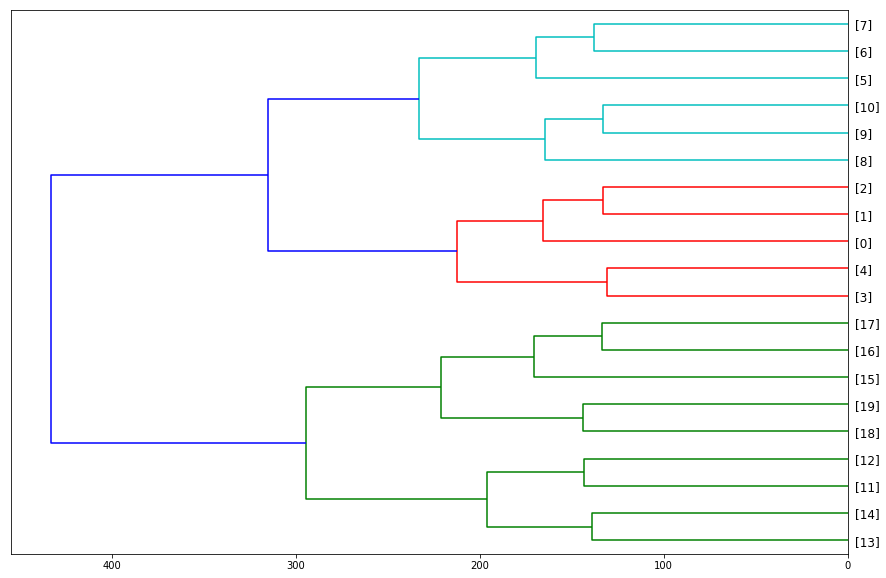

In [63]:
get_graph(similary_matrix , 10)

Năm 1999, Marahiel lấy được mã không ribosome chỉ cho 14 trong số 20 axit amin tạo protein (Ala, Asn, Asp, Cys, Gln, Glam, Ile, Leu, Phe, Pro, Ser, Thr, Tyr, Val) thiếu trình tự miền A cho 6 axit amin còn lại. Với sự sẵn có của nhiều tên miền A, giờ đây chúng ta có cơ hội điền vào những khoảng trống trong bài báo gốc của Marahiel. Xây dựng dóng hàng đa trình tự của 397 miền A sẽ làm sáng tỏ các cột bảo tồn và đưa ra dự đoán tốt nhất về các kí tự mã hóa tất cả 20 axit amin tạo nên protein dựa trên dóng hàng Marahiel. 

#### 7.4 ClustalW<a name = "clustalw"></a>

ClustalW là một chương trình dóng hàng đa trình tự phổ biến nhất trên thế giới dựa trên ý tưởng của Progressive Alignment [7] (có một giao diện đồ họa được gọi là ClustalX). 

In [51]:
# Save file.csv to file.fasta
data = []
i = 0
for x in a_domain['sequence'][0:10]:
    data.append(">"+str(i))
    data.append(x)
    i = i + 1
    data.append("")
Marahiel_data = pd.DataFrame(data, columns = ["sequence"])
Marahiel_data.to_csv("D:/Data Science/Data/Marahiel_data.txt", index = None, header = None)

In [53]:
import sys
import subprocess
from Bio import AlignIO
from Bio.Align.Applications import ClustalwCommandline

clustalw_exe = r"C:/Program Files (x86)/ClustalW2/clustalw2.exe"
in_file = r"D:/Data Science/Data/Marahiel_data.fasta"

# Multiple alignment using ClustalW version 2.
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = in_file, 
                            seqnos="ON", gapopen=11, gapext=1, matrix = "BLOSUM")
#assert (os.path.isfile(clustalw_exe))
#child = subprocess.call(str(cline), shell=(sys.platform!="win64"))

In [54]:
# Output system script .
stdout, stderr = clustalw_cline()

In [55]:
align = AlignIO.read("D:/Data Science/Data/Marahiel_data.aln", "clustal")

In [56]:
print(align)

SingleLetterAlphabet() alignment with 10 rows and 153 columns
KAVVMPGAAVVNLLAWHRR------EIPAGAGTTVAQFASLSFD...TGI 0
KAVVMPGAALVNLLAWHRR------EIPGEAGAPVAQFTTIGFD...TGT 3
KAVVMPHAGLANLLTWHAR------RFPGGTGVRTAQFTAIGFD...TTH 5
KGVMLEHRNMANLMHFTFD------QTNIAFHEKVLQYTTCSFD...TTC 7
KGVPVPHRSVASVLVPLIE------EFGLGPGSRVLQFASISFD...TTI 1
KGVVVAHRSLAATVPAQAA------AFGLGTHSRVLNFASISFD...ATM 4
KGVMLEHKGVANLQAVFAH------HLGVTPQDRAGHFASISFD...ATL 9
KGVMVEHRGIVNSVTWNRD------EFALSVRDSGTLSLSFAFD...ATY 8
KGIGITHRDAIALAADRCW------DLDTG--SRVLMHSPYAFD...CTW 6
KGVIGTHRALSAYADDHIERVLRPAAQRLGRPLRIAHAWSFTFD...AVV 2


ClustalW đưa ra các kí hiệu để xác định mức độ của các cột được bảo tồn như sau: <br>
&emsp; +) Ký hiệu "*" chỉ ra các vị trí được bảo tồn đầy đủ. <br>
&emsp; +) Ký hiệu ":" chỉ ra các vị trí được bảo tồn mạnh.<br>
&emsp; +) Ký hiệu "." chỉ ra các vị trí được bảo tồn yếu.

<a><img src="https://imgur.com/csFQ3ez.jpg" width="800" align="center">

In [57]:
# Write multiple sequence alignmnet
AlignIO.write(align, "D:/Data Science/Data/Marahiel_alignment.fasta", "fasta")

1

In [50]:
# Draw guide tree.
from Bio import Phylo
tree = Phylo.read("D:/Data Science/Data/Marahiel_data.dnd", "newick")
Phylo.draw_ascii(tree)

                                                __________________ 0
                                      _________|
         ____________________________|         |____________________ 3
        |                            |
   _____|                            |__________________________ 5
  |     |
  |     |                       _________________________________ 7
 ,|     |______________________|
 ||                            |__________________________________ 16
 ||
 ||___________________________________________________________ 10
 |
 |     _________________________________________________ 9
 |____|
 |    |__________________________________________________ 13
 |
 |                     _________________________________ 1
 |    ________________|
 |  ,|                |__________________________________ 4
 |  ||
_|__||___________________________________________________________________ 2
 |  |
 |  |____________________________________________________________ 14
 |
 |    __________

In [ ]:
"""Program to read multiple sequence alignment.
from Bio import AlignIO
alignment = AlignIO.read(open("D:/Data Science/Data/Comparing genes, proteins, genome/PF09395_seed.sth"), "stockholm")
print("Alignment length %i" % alignment.get_alignment_length())
for record in alignment :
    print(record.seq + " " + record.id)
AlignIO.read(open("D:/Data Science/Data/Comparing genes, proteins, genome/PF09395_seed.sth"), "stockholm")
print(alignment.format("fasta"))"""

Bibliography:<br>
[7] Thompson, J. D., D. G. Higgins, and T. J. Gibson. “CLUSTAL W: Improving the Sensitivity of Progressive Multiple Sequence Alignment through Sequence Weighting, Position-Specific Gap Penalties and Weight Matrix Choice.<i>” Nucleic Acids Research 22</i>, no. 22 (November 11, 1994): 4673–80. https://doi.org/10.1093/nar/22.22.4673.

#### 7.5  Multiple Sequence Comparison by Log- Expectation (MUSCLE) <a name = "muscle"></a>

Vào năm 2004, Robert Edgar đã xây dựng <b>MU</b>ltiple <b>S</b>equence <b>C</b>omparison by <b>L</b>og- <b>E</b>xpectation với thuật toán nhanh hơn và hiệu quả hơn ClustalW [8]. Phần này chỉ mang tính giới thiệu, chưa đi sâu vào tìm hiểu thuật toán của MUSCLE.

In [105]:
from Bio.Align.Applications import MuscleCommandline
from io import StringIO
from Bio import AlignIO

In [114]:
muscle_exe = r"C:/Program Files (x86)/ClustalW2/muscle3.8.31_i86win32.exe"
in_file = r"D:/Data Science/Data/MUSCLE/Marahiel_data.fasta"
muscle_cline = MuscleCommandline(muscle_exe, input=in_file)
stdout, stderr = muscle_cline()
align = AlignIO.read(StringIO(stdout), "fasta")
print(align)

SingleLetterAlphabet() alignment with 397 rows and 191 columns
KGVMLSHRNILSESAGTIQMNH--------FDS-----EA--VT...ITW 245
KLIPRTHDDYVFNA-TASAALC----R---LSA-----DDVYLV...FTR 120
KLIPRTHDDYAYQC-RVTAGIC----G---LDA-----DSVYLA...FTR 129
KLIPRRHADYSYNF-SASAELC----G---ISQ-----QSVYLA...FTR 173
KLIPRTHDDYLYSV-RESAKIC----E---LNQ-----TSRLLM...YTR 216
KLIPRRHREYLYNV-RASAEVC----G---FDE-----HTVYLT...YTR 368
KLIPRTHNDYDYSV-RASAEIC----A---LTP-----QTRFLC...YTR 240
KLIPRTHNDYDYSV-RASAEIC----A---LTP-----QTRFLC...YTR 318
KLIPRTHNDYYYSV-RRSNEIC----G---FNE-----ETRFLC...YTR 284
KLIPRTHNDYYYSV-RRSNEIC----G---FNE-----DTRFLC...YTR 287
KLIPRTHNDYYYSV-RRSAEIC----Q---FTQ-----QTRYLC...YTR 197
KLIPRTHNDYYYSV-RRSVEIC----Q---FTQ-----QTRYLC...YTR 238
KLIPRTHNDYYYSV-RRSVEIC----Q---FTQ-----QTRYLC...YTR 81
KLIPRTHNDYYYSV-RRSVEIC----Q---FTQ-----QTRYLC...YTR 281
KLIPRTHNDYAYSV-TASVEIC----R---FDQ-----HTRYLC...YTR 328
KLIPRTHDEYIYSL-RKSVEIC----R---ISQ-----DTNFLA...YTR 236
KLIPRTHDDYIYSL-RVSAEIC----N---LSA-----ESVYMA...YTR 196
KLI

In [115]:
# Write multiple sequence alignmnet
AlignIO.write(align, "D:/Data Science/Data/MUSCLE/Marahiel_alignment.fasta", "fasta")

1

Bibliography:<br>
[8] Edgar, Robert C. “MUSCLE: A Multiple Sequence Alignment Method with Reduced Time and Space Complexity.” <i>BMC Bioinformatics</i> 5 (August 19, 2004): 113. https://doi.org/10.1186/1471-2105-5-113.

#### 7.6 Scoring Multiple Alignments<a name = "scoring-multiple-alignments"></a>

Việc lựa chọn hàm cho điểm có thể ảnh hưởng mạnh đến chất lượng của nhiều dóng hàng. Ở phần 7.1 chúng ta đã mô tả một cách để tính điểm của dóng hàng t chiều bằng cách sử dụng ma trận tính điểm t chiều. Dưới đây, chúng ta sẽ mô tả các cách tiếp cận thực tế hơn để tính điểm các dóng hàng.

#### 7.6.1  Multiple LCS Score

Một cột là "match" nếu tất cả các kí tự trong một cột đều giống nhau. Khi đó, điểm của một Multiple LCS là tổng các match. Cách tính điểm này tốt cho các trình tự rất giống nhau.

<a><img src="https://imgur.com/q0yoGeo.jpg" width="50" align="center">

#### 7.6.2 Entropy Score

Định nghĩa $p_x$ là tần số của một kí tự x trong một cột của dóng hàng đa trình tự. Entropy của mỗi cột được tính như sau:
$$Entropy\,of\,Column = -\sum_{X=A,T,G,C}P_XlogP_X$$

Entropy score sẽ bằng tổng các entropy của tất cả các cột. Nếu các cột càng giống nhau thì Entropy score càng nhỏ, do đó để tìm kiếm một dóng hàng đa trình tự tối ưu ta sẽ đi tìm một dóng hàng đa trình tự có Entropy score nhỏ nhất.

#### 7.6.3 Sum of Pairs Score (SP-Score)

Chúng ta hãy xem xét một Multiple Alignment Projections (MSA), một đường 3D của dóng hàng 3 trình tự (đường đỏ nét liền) được chiếu xuống 3 mặt phẳng 2D tạo ra 3 đường khác nhau (đường đỏ nét đứt) đại diện cho sự dóng hàng của 3 cặp trình tự.

<a><img src="https://imgur.com/wZcBK4i.jpg" width="400" align="center">

Như vậy, dóng hàng theo cặp của các trình tự $a_i$, $a_j$ có thể được suy ra từ dóng hàng k trình tự. Ký hiệu điểm của dóng hàng theo cặp này là $s^*(a_i, a_j)$, tổng điểm của các cặp (sum of pairs score hay SP-score) được tính như sau:
$$s(a_1, ..., a_k) = \sum_{i, j}s^*(a_i, a_j).$$

#### 7.7 Các vấn đề của dóng hàng đa trình tự<a name = "problem-of-multi-alignment"></a>

Các Protein đa miền phát triển không chỉ thông qua đột biến điểm mà còn thông qua trùng lặp miền và tái tổ hợp miền.

Mặc dù dóng hàng đa trình tự là một bài toán 30 năm tuổi nhưng không có cách tiếp cận nào để dóng hàng các trình tự được sắp xếp lại (nghĩa là, protein đa miền với các miền bị xáo trộn) trước năm 2002. Để giải quyết vấn đề này chúng ta có thể sử dụng phương pháp A-Bruijn Alignment (ABA) sẽ được trình bày ở một phần khác.

Thường không thể dóng hàng tất cả các trình tự protein trên suốt toàn bộ chiều dài của chúng.